# <span style="color:blue">Localis-eau</span>


### Qualité de l’eau du réseau de distribution - unités de distribution (UDI) ou point de prélèvement le plus proche

![Logo](eau-banderole.jpg)


### Contexte du défi 

Afin d’étudier dans quelle mesure la qualité de l’eau du robinet peut avoir un impact sur
l’état de santé des populations, il faut pouvoir relier des bases comme SISE-Eaux,
compilant les données mesurées de la qualité de l’eau distribuée dans tous les réseaux
français, à des données de santé. Ces données peuvent être issues, par exemple,
d’outils épidémiologiques comme la cohorte Constances. L’un des projet adossés à
Constances, Cancerwatch porté par ISGlobal (Barcelone, Espagne), est actuellement en
train d’analyser les relations entre différents paramètres de la qualité de l’eau issus de
SISE-Eaux, notamment les sous-produits de décontamination de l’eau, et le risque de
cancer parmi les participants. Dans Cancerwatch, il est prévu d’assigner aux participants
de la cohorte, à chaque adresse résidentielle depuis l’an 2000, les valeurs de divers
paramètres de qualité d’eau. Le tracé vectorisé des unités de distribution de l’eau (UDI)
n’étant pas millésimé et remontant au maximum à 2018, il n’est pas possible de savoir
par quelles UDI sont desservis les domiciles des participants, donc une autre méthode a
été mise en place. C'est dans ce contexte, et afin d’évaluer la fiabilité de l’assignation des
valeurs de qualité de l’eau aux adresses des participants, qu'est proposé le défi.

### Idée du défi 

L’idée du défi est de comparer, avec les données open qui contiennent le tracé
des UDI pour certaines régions et certaines années, les paramètres de la
qualité de l’eau après appariement aux points de prélèvement le plus proche,
ou appariement à l’UDI adéquate.
Le but ultime est de comparer, pour l’ensemble des géocodes fictifs fournis, mais
aussi par région, ou par type de densité de population. Cela permettra de
fournir une indication de la validité des valeurs de qualité de l’eau obtenues
par la méthode ‘point le plus proche’. Cela permettra de mieux interpréter les
résultats de l’étude épidémiologique.


### Implications pour les études épidémiologiques


L’étude épidémiologique dans Constances utilisant les données SISE-eaux non
open a pour but de calculer des associations, donc des liens chiffrés entre
exposition à différents produits de la décontamination de l’eau (les chloro- et
bromo-formes, THM4...) et nitrate, et le risque de développer un cancer. 


Le défi
permettra donc de pouvoir guider sur les analyses secondaires (eg, sélectionner
les régions où il y a la meilleure concordance entre la méthode ‘point le plus
proche’ ou ‘UDI’), et interpréter les résultats en fonction du degré de
concordance entre les deux méthodes.



Ultimement, le défi permettra aussi de guider les chercheurs souhaitant étudier
les relations entre qualité de l’eau et événements de santé dans Constances,
vers le meilleur jeu de données : sise-eau non open en cas d’hypothèses fortes
sur l’exposition lointaine ou à long terme, ou données open.



En dehors de Constances, le défi permettra aussi de documenter les résultats
des deux méthodes utilisées pour cette étude spécifique, et d’aider les
chercheurs à choisir entre les méthodes ou à développer la méthode de leur
choix.

## <span style="color:blue">Partie I - Exploration du fichier final </span>



In [32]:
# Importation des librairies
library(ggpubr)
library(data.table)
library(tidyverse)
library(dplyr)

In [2]:
# Importation du fichier tableau_pour_analyse.csv (fichier avec les différentes jointures) 
tableau_analyse <- fread("tableau_pour_analyse.csv", sep=";") 

In [3]:
# aperçu du fichier
head(tableau_analyse)

V1,ident,code_udi,cdpointsurv,distance,fiab_coord,annee,region,cdparametresiseeaux,mediane_udi,nombre_prelev_udi,mediane_point,nombre_prelev_point,type_com,x,TUU2017_rural,TDUU2017_rural,TYPE_rural
<int>,<int>,<chr>,<int64>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,19776,008001547,80000001043,2523.9,0,2021,Grand_Est,CDT25,285,4,705,1,Hors unité urbaine,"c(4.58459638842704, 49.3513367479079)",99,99,99
2,19776,008001547,80000001043,2523.9,0,2021,Grand_Est,CL2LIB,"0,165",4,0,1,Hors unité urbaine,"c(4.58459638842704, 49.3513367479079)",99,99,99
3,19776,008001547,80000001043,2523.9,0,2021,Grand_Est,CL2TOT,"0,175",4,0,1,Hors unité urbaine,"c(4.58459638842704, 49.3513367479079)",99,99,99
4,19776,008001547,80000001043,2523.9,0,2021,Grand_Est,NO3,"5,25",4,"0,8",1,Hors unité urbaine,"c(4.58459638842704, 49.3513367479079)",99,99,99
5,19776,008001547,80000001043,2523.9,0,2021,Grand_Est,PH,"7,8",8,"7,75",2,Hors unité urbaine,"c(4.58459638842704, 49.3513367479079)",99,99,99
6,1415,008000526,80000000532,1198.9,0,2021,Grand_Est,CDT25,790,4,790,4,Hors unité urbaine,"c(4.48401356719922, 49.4990581496182)",99,99,99


In [4]:

# Ajouter une nouvelle colonne avec les catégories spécifiées
tableau_analyse <- tableau_analyse %>%
  mutate(categorie_zone = case_when(
    TUU2017_rural == 99 ~ "Rural",
    TUU2017_rural %in% c(1, 2, 3, 4, 5, 6) ~ "Urban_moyen",
    TUU2017_rural %in% c(7, 8) ~ "Urban_fort",
    TRUE ~ NA_character_
  ))

# Afficher le nouveau tableau avec la colonne ajoutée
head(tableau_analyse)


V1,ident,code_udi,cdpointsurv,distance,fiab_coord,annee,region,cdparametresiseeaux,mediane_udi,nombre_prelev_udi,mediane_point,nombre_prelev_point,type_com,x,TUU2017_rural,TDUU2017_rural,TYPE_rural,categorie_zone
<int>,<int>,<chr>,<int64>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,19776,008001547,80000001043,2523.9,0,2021,Grand_Est,CDT25,285,4,705,1,Hors unité urbaine,"c(4.58459638842704, 49.3513367479079)",99,99,99,Rural
2,19776,008001547,80000001043,2523.9,0,2021,Grand_Est,CL2LIB,"0,165",4,0,1,Hors unité urbaine,"c(4.58459638842704, 49.3513367479079)",99,99,99,Rural
3,19776,008001547,80000001043,2523.9,0,2021,Grand_Est,CL2TOT,"0,175",4,0,1,Hors unité urbaine,"c(4.58459638842704, 49.3513367479079)",99,99,99,Rural
4,19776,008001547,80000001043,2523.9,0,2021,Grand_Est,NO3,"5,25",4,"0,8",1,Hors unité urbaine,"c(4.58459638842704, 49.3513367479079)",99,99,99,Rural
5,19776,008001547,80000001043,2523.9,0,2021,Grand_Est,PH,"7,8",8,"7,75",2,Hors unité urbaine,"c(4.58459638842704, 49.3513367479079)",99,99,99,Rural
6,1415,008000526,80000000532,1198.9,0,2021,Grand_Est,CDT25,790,4,790,4,Hors unité urbaine,"c(4.48401356719922, 49.4990581496182)",99,99,99,Rural


In [5]:
# Conversion des colonnes en valeurs numériques
tableau_analyse <- tableau_analyse %>%
  mutate(mediane_udi = as.numeric(gsub(",", ".", mediane_udi)),
         mediane_point = as.numeric(gsub(",", ".", mediane_point)))


<span style="color:blue">**Rappel du contexte**</span>


In [6]:
# paramètres qualité à prendre en compte 
liste_parametres_qualite <- c("BR",  "BRF", "BRURE" , "CDT", "CDT25", "CL2LIB", "CL2TOT" , "CLATE",
                              "CLF",
                              "CLITE", "CLITEMG", "COD" , "COT", "DBRMCL" ,
                              "DCLMBR", "MOAC", "MOAF", "MOBC", "NO3", "PH", "TAC", "THM", "THM4")

# Définition des Annnees et région 

regions <- c("Grand_Est", "Nouvelle_Aquitaine", "Bretagne", "Centre_Val_de_Loire", "Auvergne_Rhone_Alpes",
             "Bourgogne_Franche_Comte" , "Normandie", "Occitanie", "Pays_de_la_Loire", "PACA")
annees <- c(2021, 2020, 2023, 2021, 2021, 
            2019, 2021,2021,2018,2022 ) 



## <span style="color:blue">Partie II - Visualisation</span>


<div style="background-color:steelblue; padding:10px">    
<span style="color:white; text-transform:uppercase; font-weight:bold">Comparaison visuelle des 2 méthodes à travers des graphes de correlation pour chaque région 
    </span>     
</div>




<div style="background-color:olivedrab; padding:10px">
<span style="color:white; font-weight:bold">Region Grand_Est</span>
</div>


##### Avec outliers

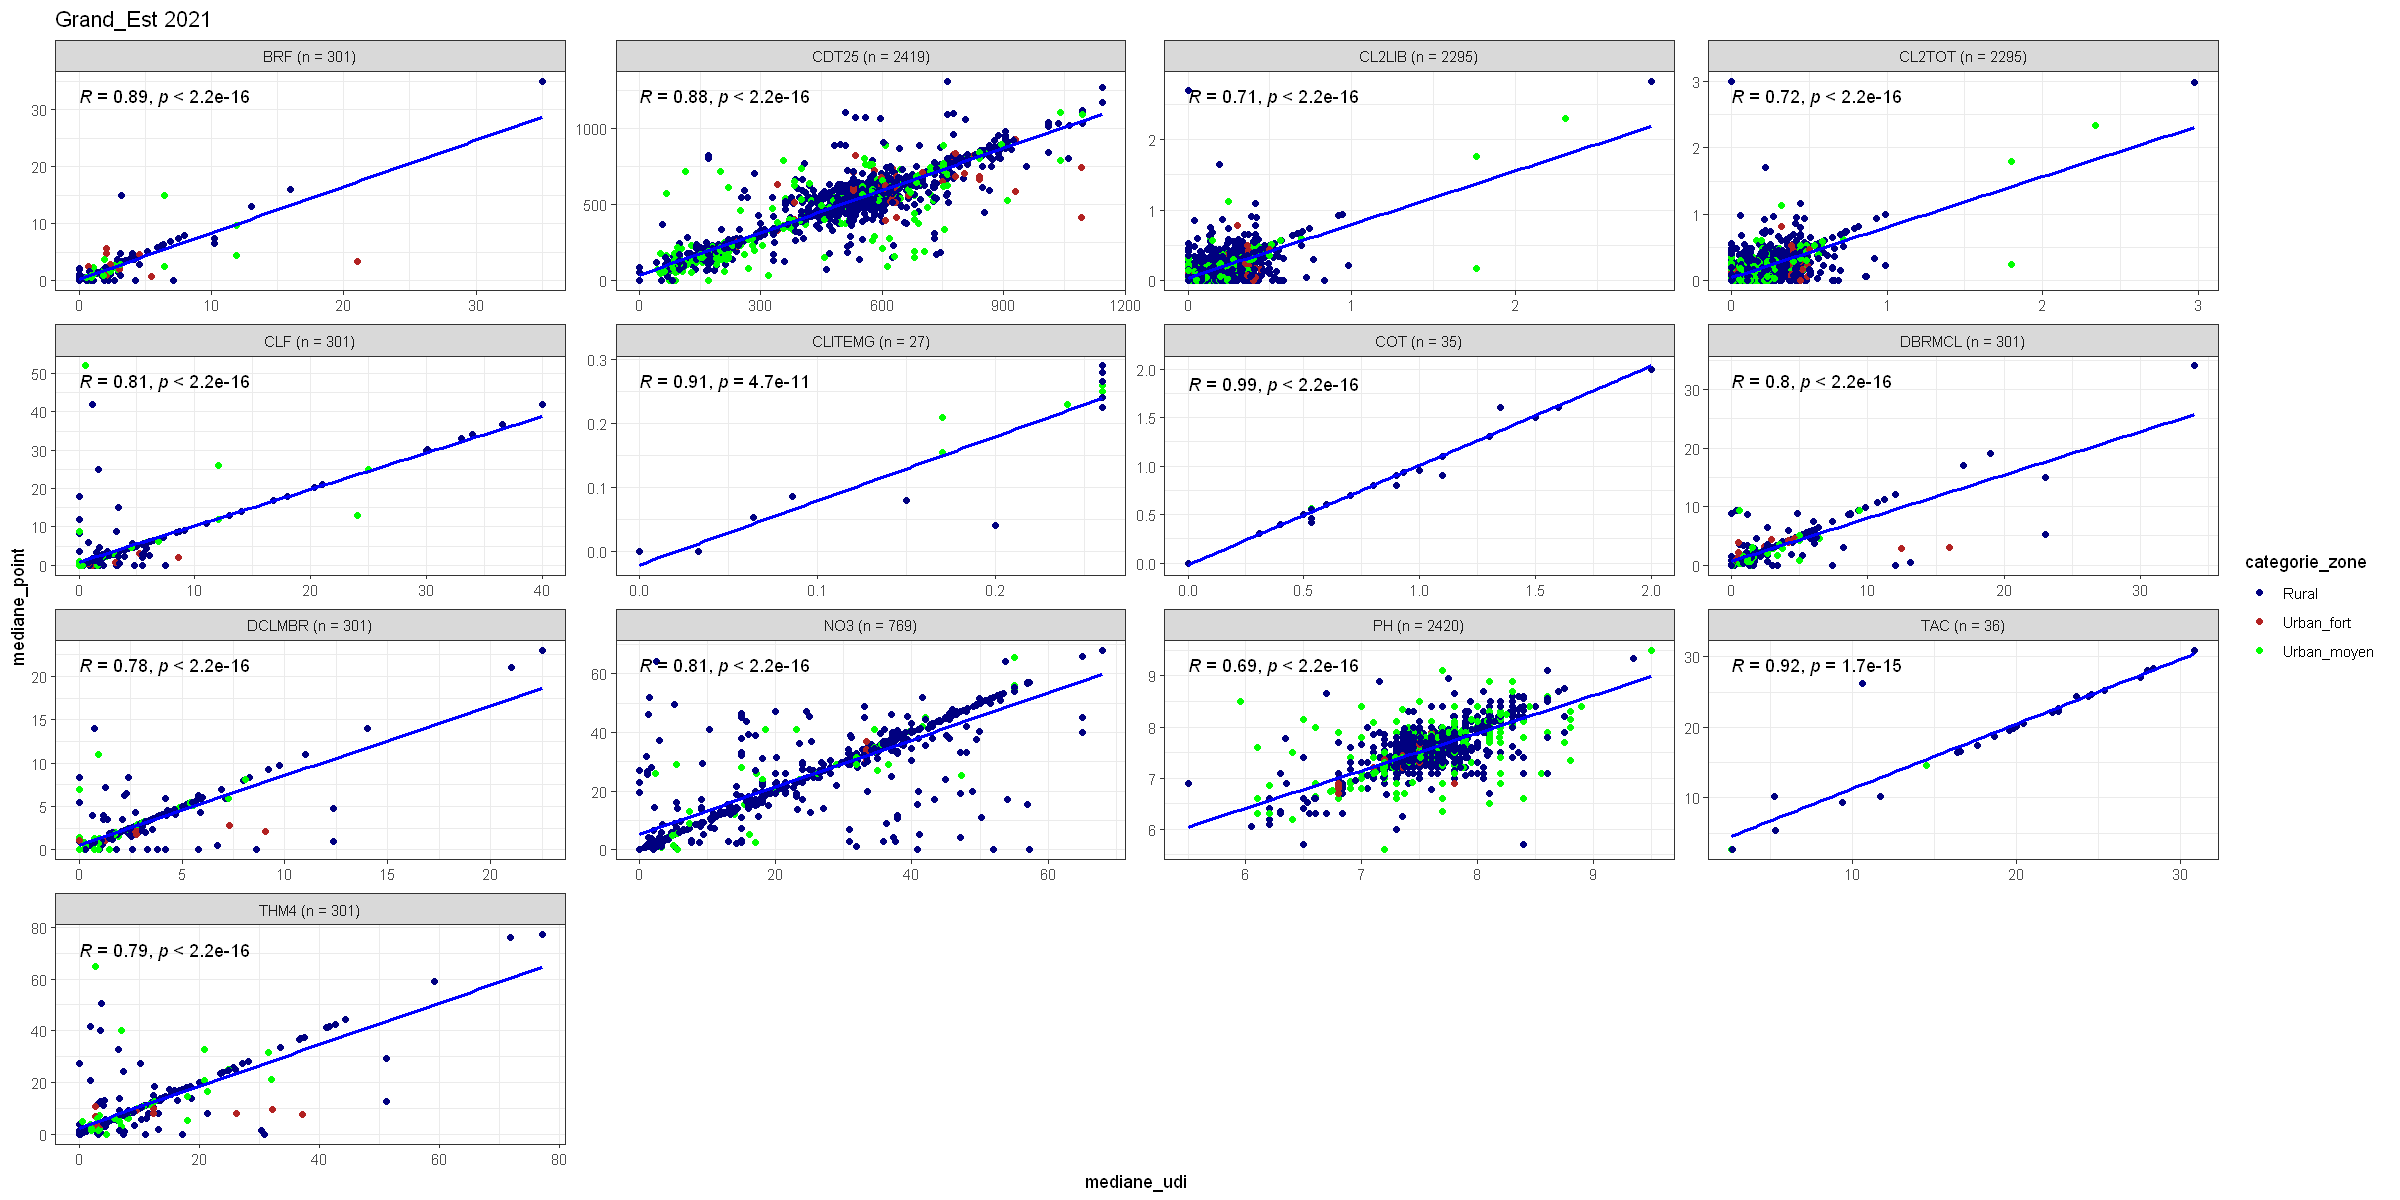

In [34]:
options(repr.plot.width=20, repr.plot.height=10)

graphe_1 <- function(data = tableau_analyse, parametre = liste_parametres_qualite, 
                     region_select = "Grand_Est", annee_select = 2021,
                     retirer_outlier = FALSE) {
  
  data <- data %>%
    filter(!is.na(mediane_udi), !is.na(mediane_point)) %>%
    filter(cdparametresiseeaux %in% parametre, region == region_select, annee == annee_select)
  
  if (retirer_outlier) {
    data <- data %>%
      group_by(cdparametresiseeaux) %>%
      mutate(limite_outlier_udi = (quantile(mediane_udi, 0.75, na.rm = TRUE) - quantile(mediane_udi, 0.25, na.rm = TRUE)) * 3) %>%
      mutate(limite_outlier_point = (quantile(mediane_point, 0.75, na.rm = TRUE) - quantile(mediane_point, 0.25, na.rm = TRUE)) * 3) %>%
      ungroup() %>%
      filter(mediane_udi <= limite_outlier_udi, mediane_point <= limite_outlier_point)
  }
  
  data %>%
    group_by(cdparametresiseeaux) %>%
    mutate(cdparametresiseeaux = paste0(cdparametresiseeaux, " (n = ", n(), ")")) %>%
    ungroup() %>%
    ggplot() +
    geom_point(aes(x = mediane_udi, y = mediane_point, color = categorie_zone)) +
    geom_smooth(aes(x = mediane_udi, y = mediane_point), method = "lm", se = FALSE, color = "blue", formula = y ~ x) +
    stat_cor(aes(x = mediane_udi, y = mediane_point), method = "spearman") +
    facet_wrap(~cdparametresiseeaux, scales = "free") +
    scale_color_manual(values = c("Rural" = "navy", "Urban_moyen" = "green", "Urban_fort" = "gold")) +  # Couleurs personnalisées
    theme_bw() +
    ggtitle(label = paste(region_select, annee_select))
}

graphe_1()


##### Sans outliers

[1] "Region Grand_Est_2021 sans outliers"


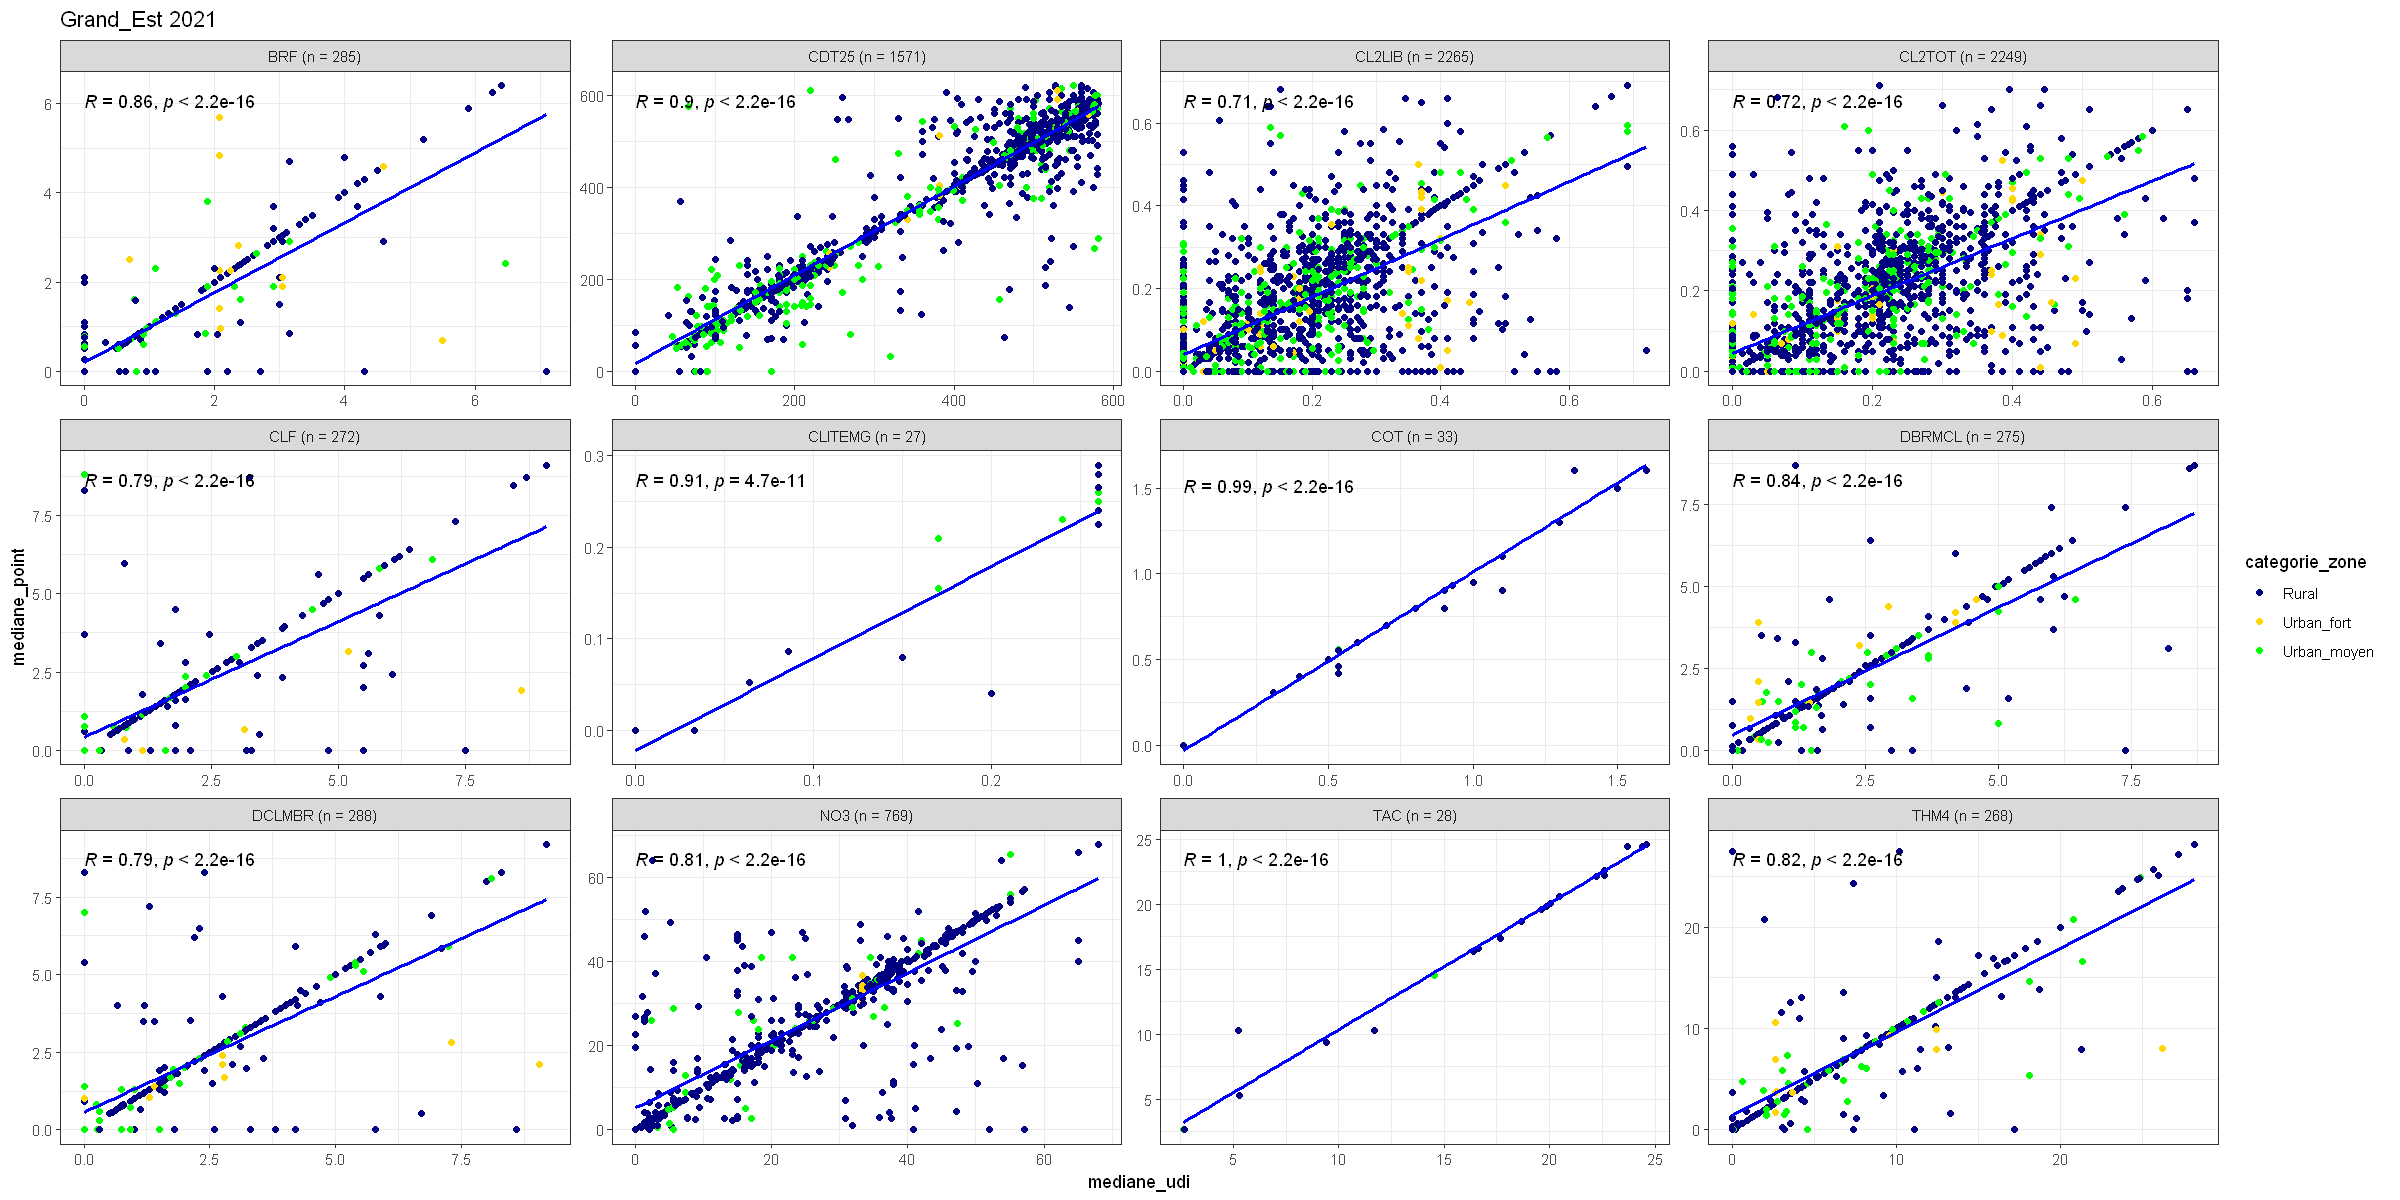

In [35]:

print("Region Grand_Est_2021 sans outliers")
graphe_2 <- function(data = tableau_analyse, parametre =liste_parametres_qualite, 
                       region_select = "Grand_Est",annee_select =2021,
                       retirer_outlier = TRUE){
    
   data <-  data %>% 
      filter(!is.na(mediane_udi) , !is.na(mediane_point)) %>% 
      filter(cdparametresiseeaux %in% parametre, region ==region_select, annee ==annee_select) 
  
    
   if(retirer_outlier ){
     
    data <-  data %>% 
       group_by( cdparametresiseeaux) %>% #annee, region,
       mutate(limite_outlier_udi = (quantile(mediane_udi,0.75, na.rm=T)- quantile(mediane_udi,0.25,na.rm=T))*3 ) %>% 
       mutate(limite_outlier_point = (quantile(mediane_point,0.75, na.rm=T)- quantile(mediane_point,0.25, na.rm=T))*3 ) %>% 
      ungroup() %>% 
       filter(mediane_udi <= limite_outlier_udi, mediane_point <= limite_outlier_point) 
   }
    
data %>% 
  group_by(cdparametresiseeaux) %>%
  mutate(cdparametresiseeaux = paste0(cdparametresiseeaux, " (n = ", n(), ")")) %>%
  ungroup() %>%
      ggplot()+ geom_point(aes(x= mediane_udi, y = mediane_point,color = categorie_zone))+
      geom_smooth(aes(x=  mediane_udi, y = mediane_point),method = "lm", se=FALSE, color="blue", formula =  y ~ x)+
      stat_cor(aes(x=  mediane_udi, y = mediane_point),method = "spearman")+
      facet_wrap(~ cdparametresiseeaux, scales = "free")+
      scale_color_manual(values = c("Rural" = "navy", "Urban_moyen" = "green", "Urban_fort" = "gold")) +  # Couleurs personnalisées
      theme_bw() +
      ggtitle(label = paste(region_select,annee_select ))
  }
 
  graphe_2() 


<div style="background-color:olivedrab; padding:10px">
<span style="color:white; font-weight:bold">Region Nouvelle_Aquitaine</span>
</div>


##### Avec outliers

[1] "Region Nouvelle_Aquitaine"


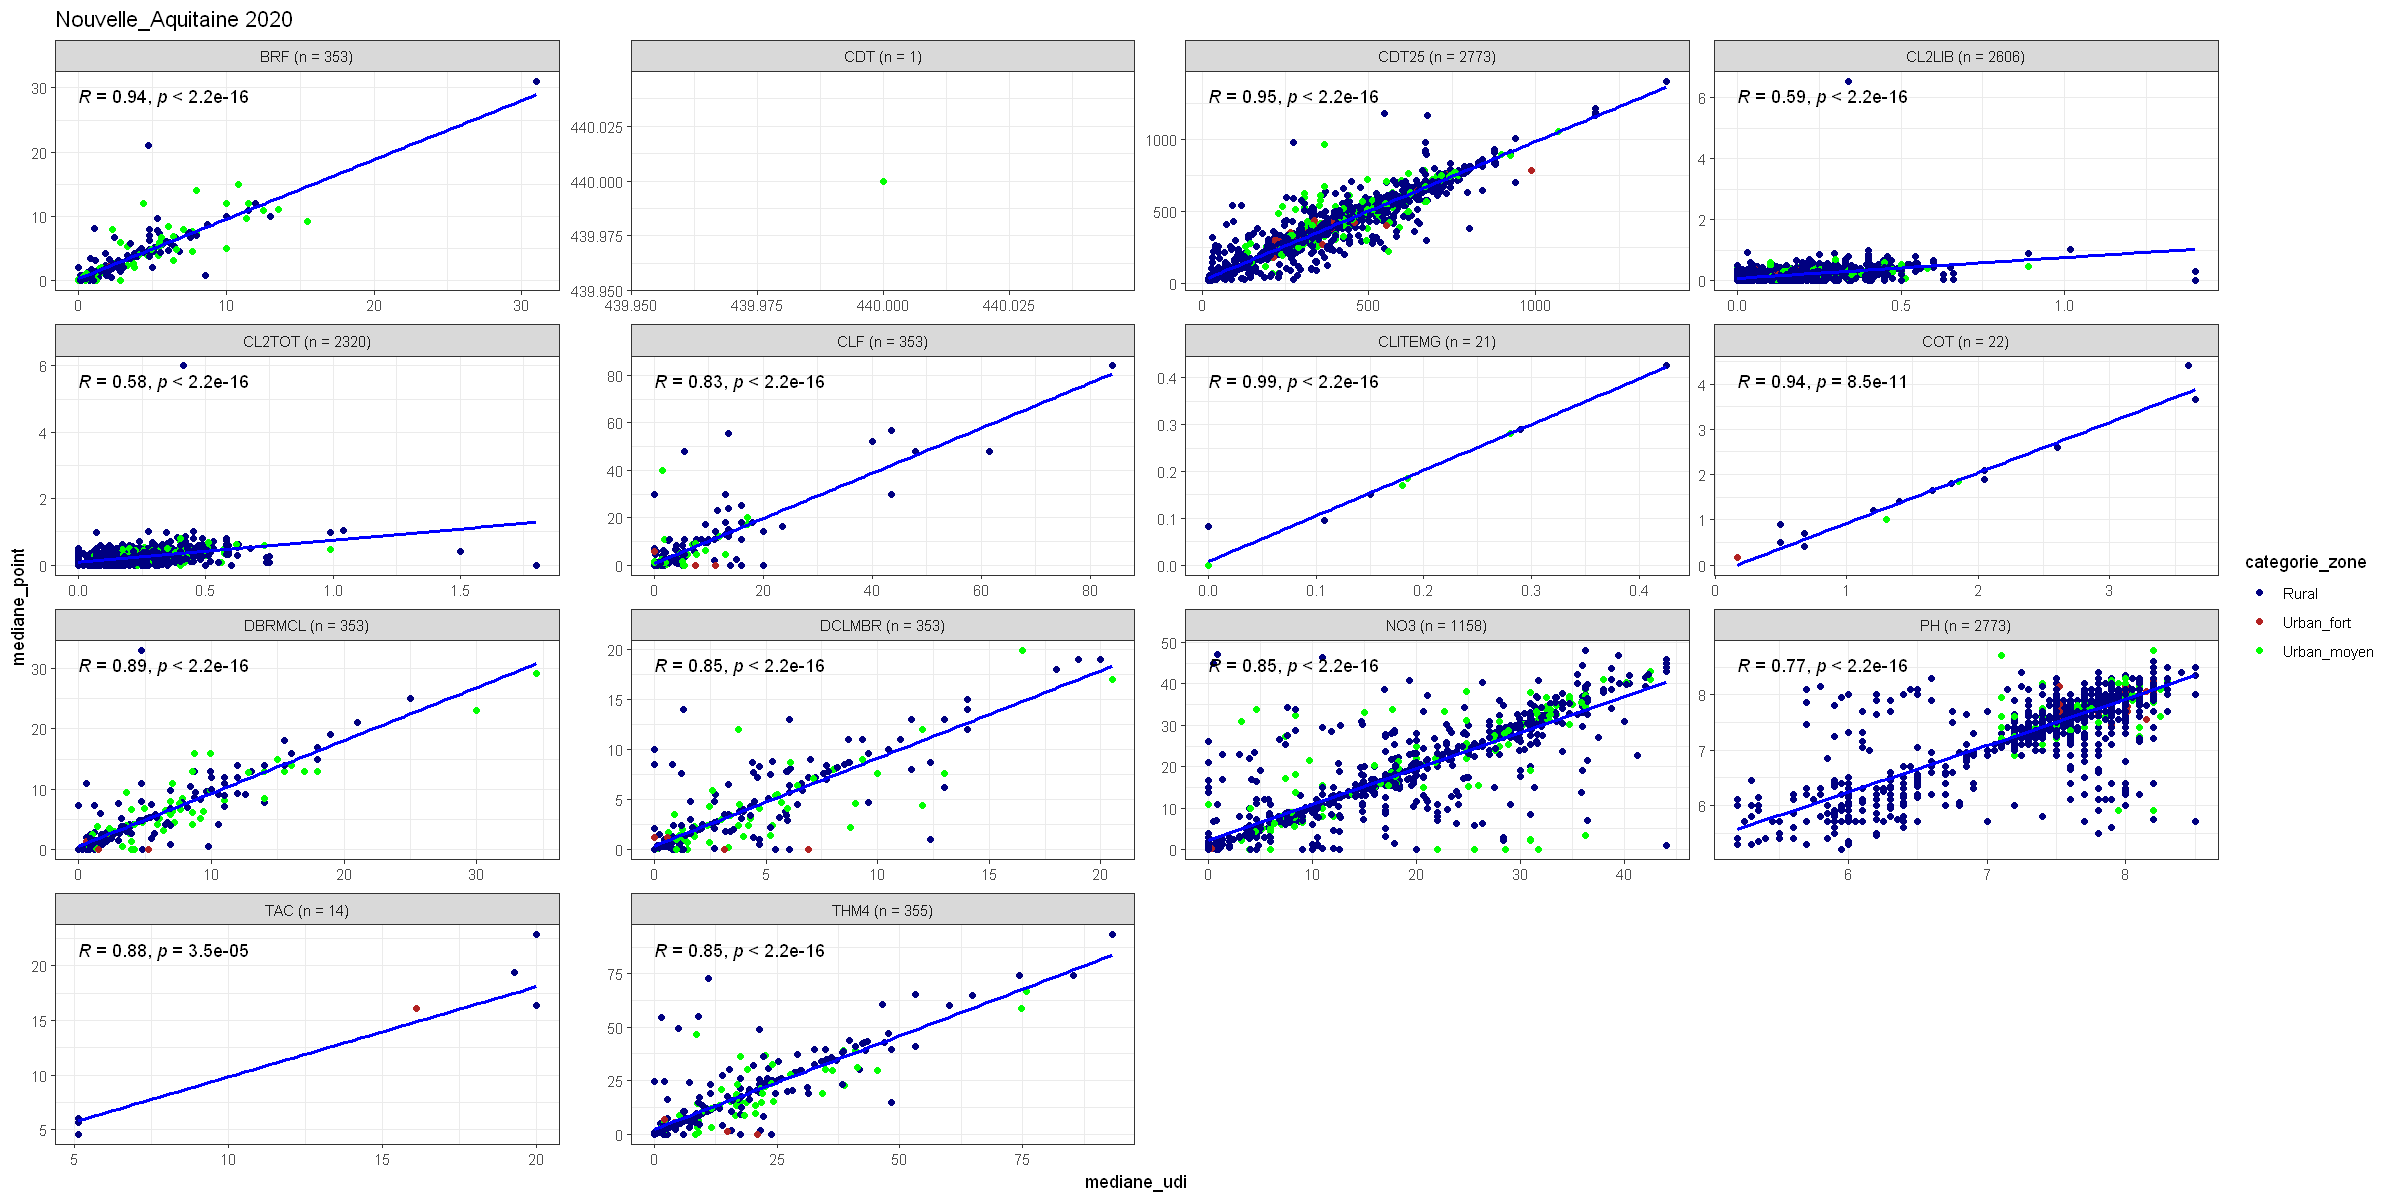

In [36]:

all_graphes_avec_outliers <-  map2(regions, annees, ~ graphe_1(region_select= .x, annee_select  = .y))

print("Region Nouvelle_Aquitaine")
all_graphes_avec_outliers[[2]]

##### Sans outliers

[1] "Region Nouvelle_Aquitaine sans outliers"


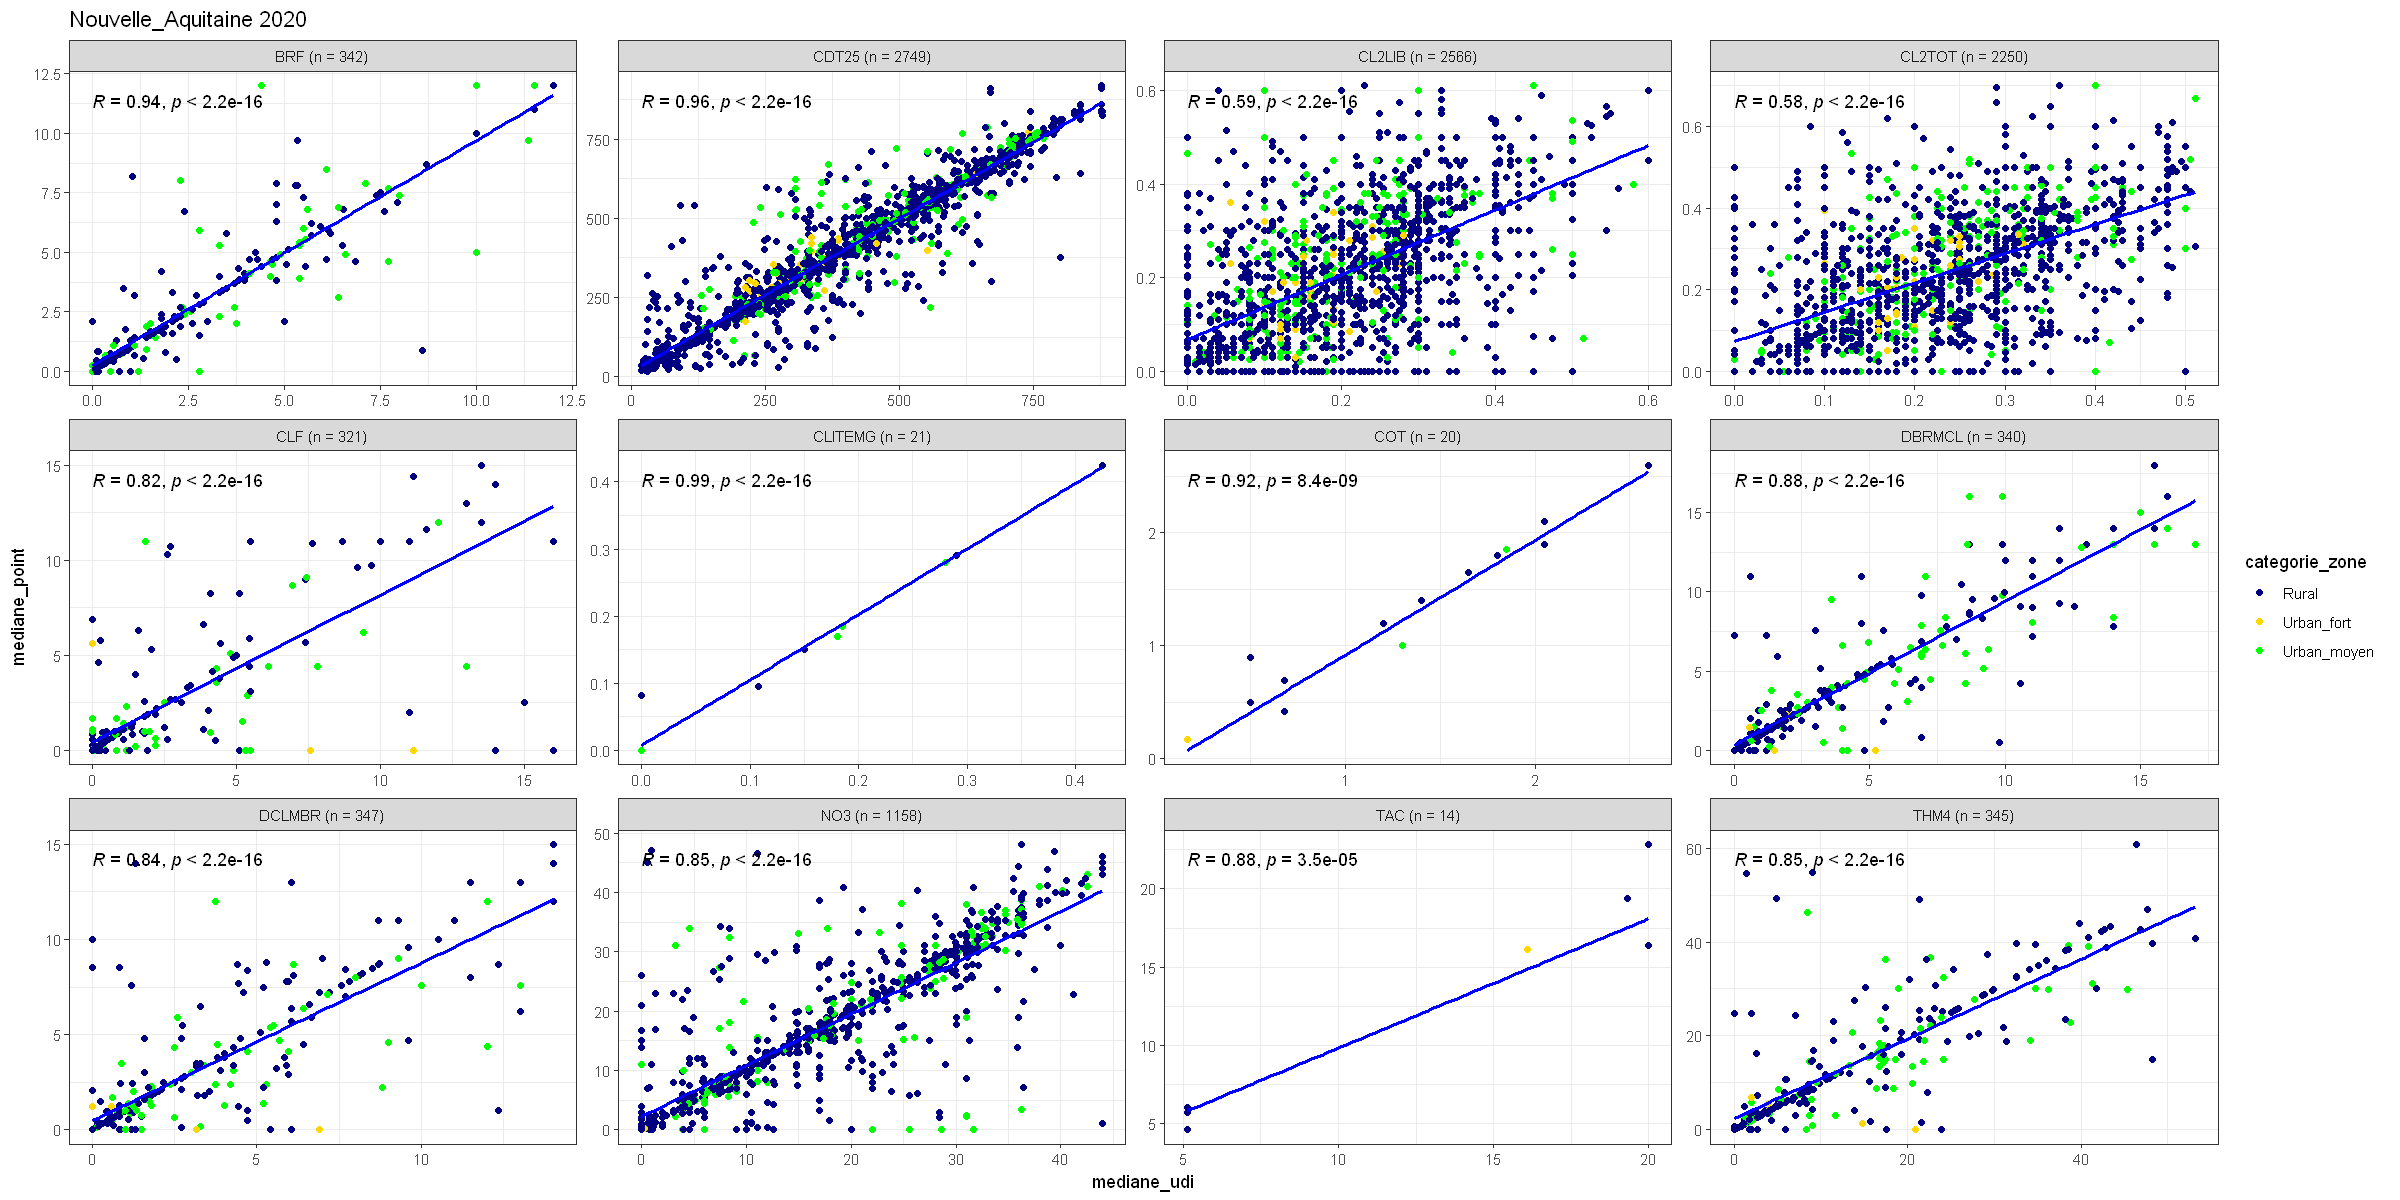

In [37]:

all_graphes_sans_outliers <-  map2(regions, annees, ~ graphe_2(region_select= .x, annee_select  = .y))

print("Region Nouvelle_Aquitaine sans outliers")
all_graphes_sans_outliers[[2]]

<div style="background-color:olivedrab; padding:10px">
<span style="color:white; font-weight:bold">Region Bretagne</span>
</div>


##### Avec outliers

[1] "Region Bretagne"


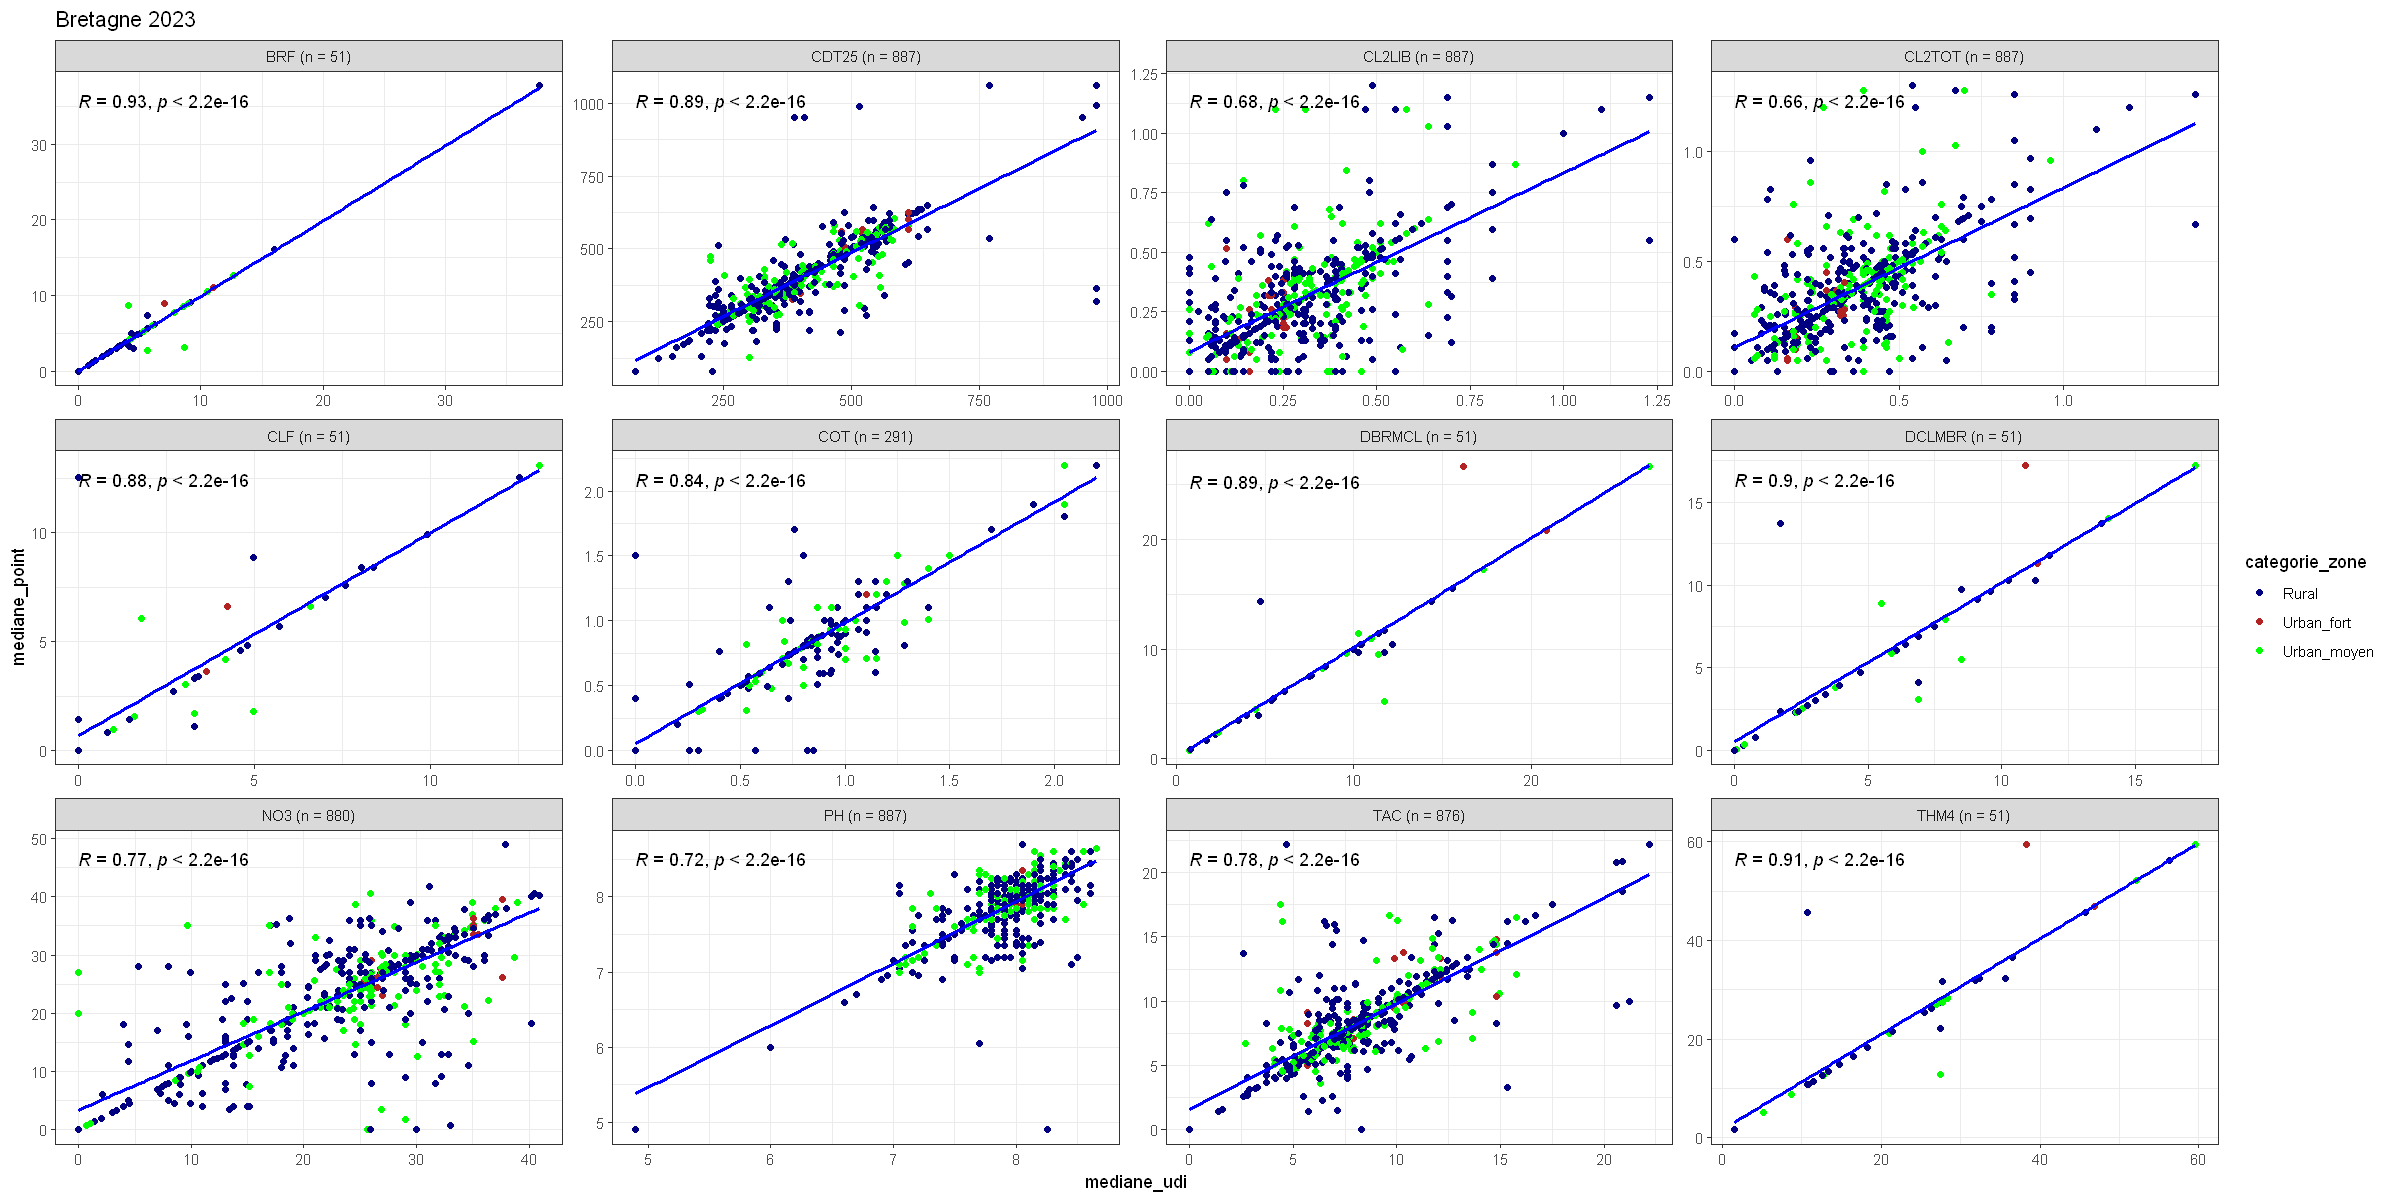

In [38]:
print("Region Bretagne")
all_graphes_avec_outliers[[3]]

##### Sans outliers

[1] "Region Bretagne sans outliers"


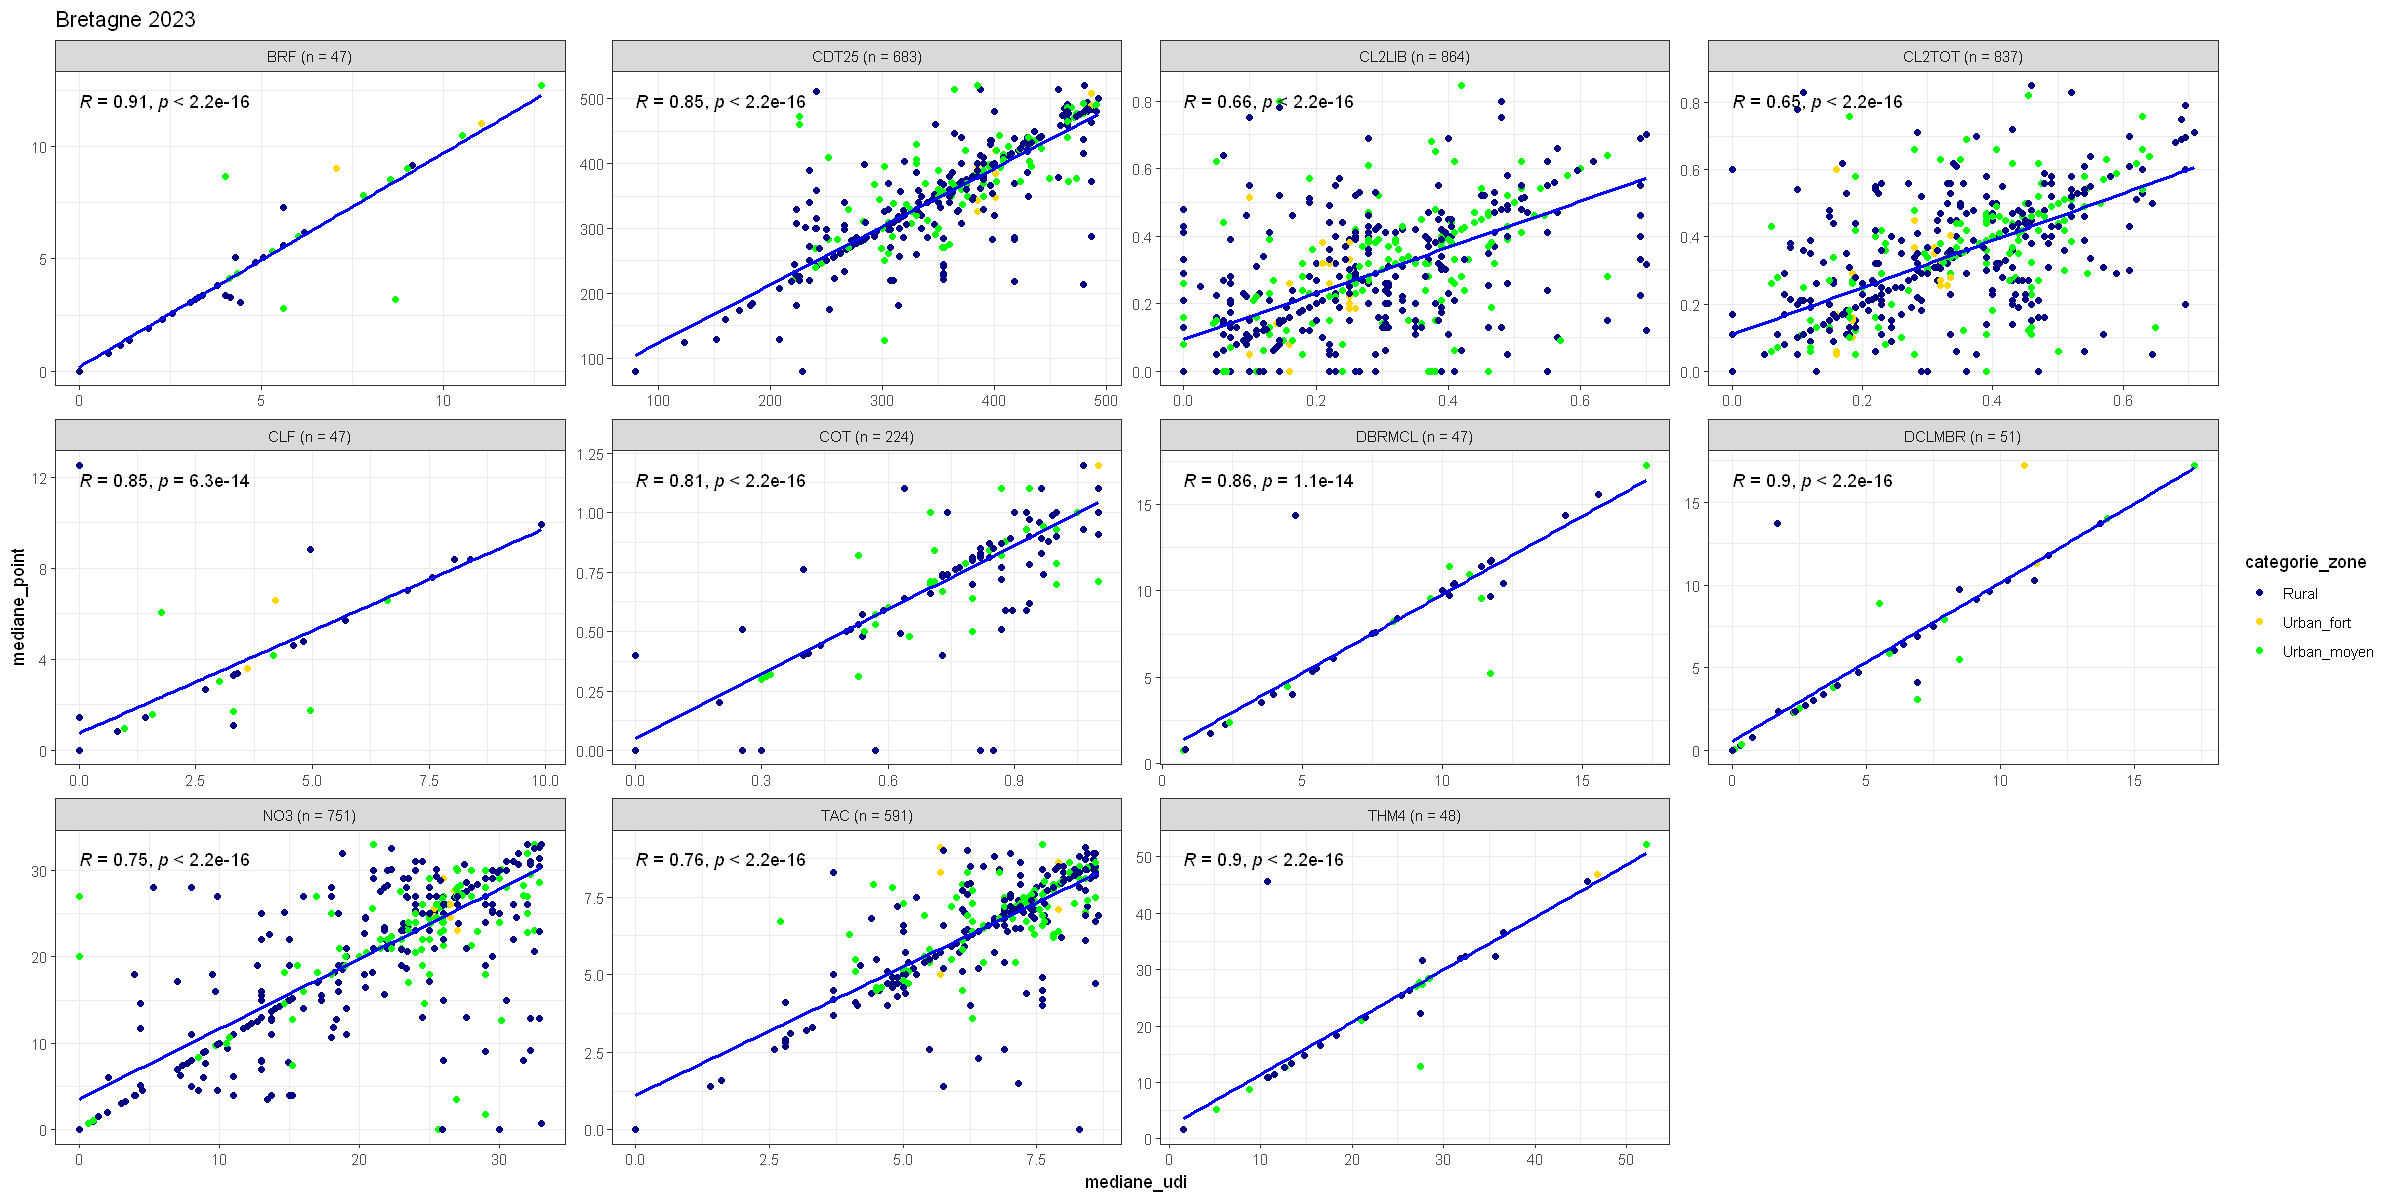

In [39]:
print("Region Bretagne sans outliers")
all_graphes_sans_outliers[[3]]


<div style="background-color:olivedrab; padding:10px">
<span style="color:white; font-weight:bold">Region Centre_Val_de_Loire</span>
</div>

##### Avec outliers

[1] "Region Centre_Val_de_Loire"


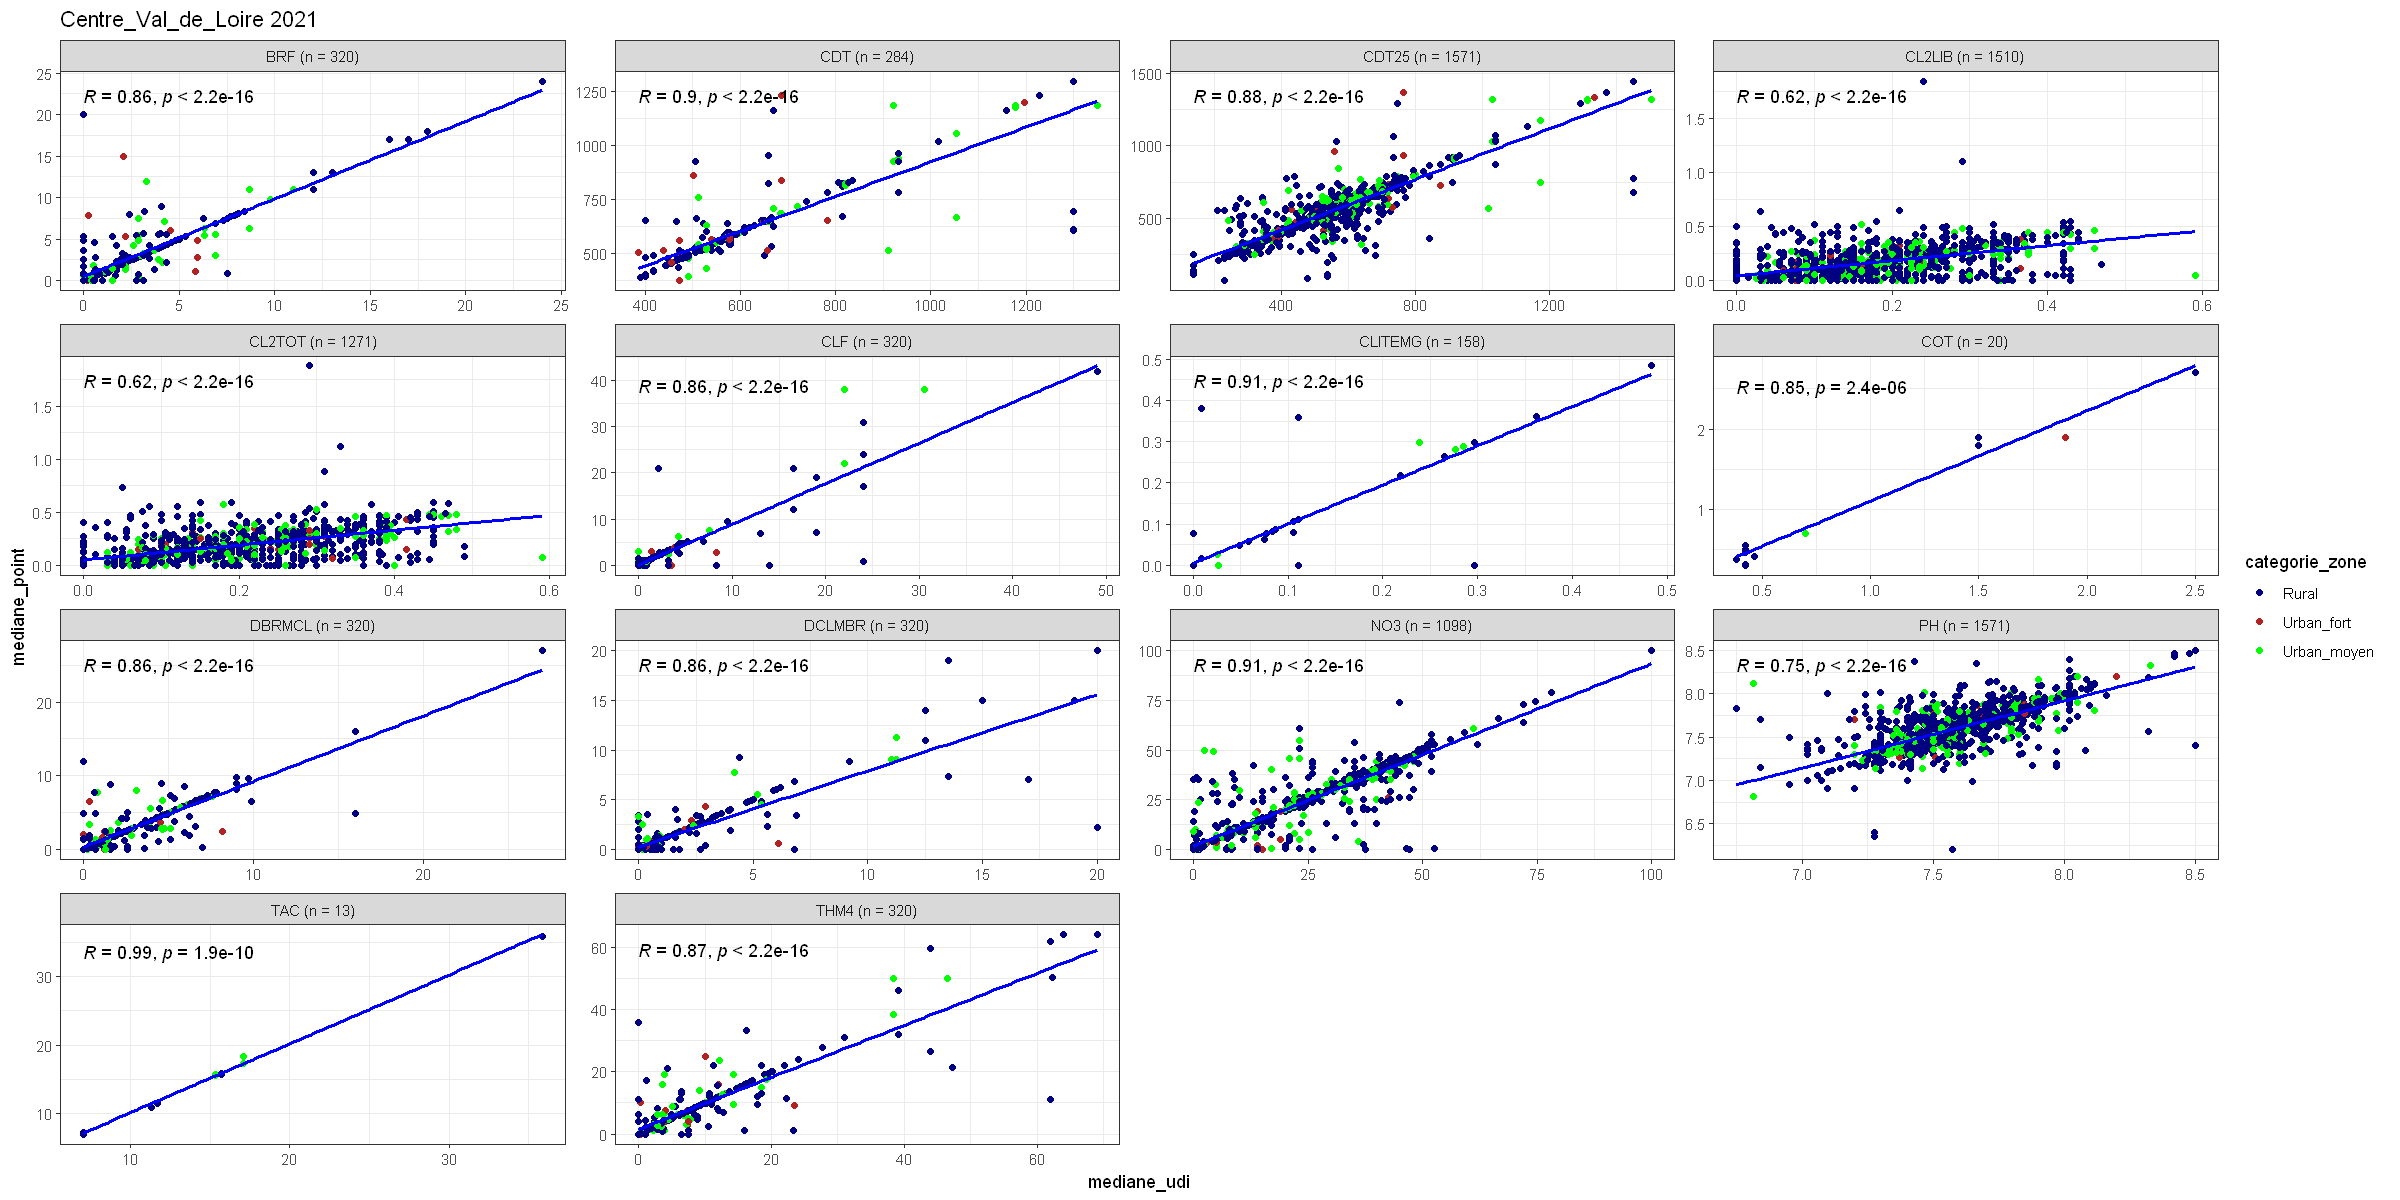

In [40]:
print("Region Centre_Val_de_Loire")
all_graphes_avec_outliers[[4]]

##### Sans outliers

[1] "Region Centre_Val_de_Loire sans outliers"


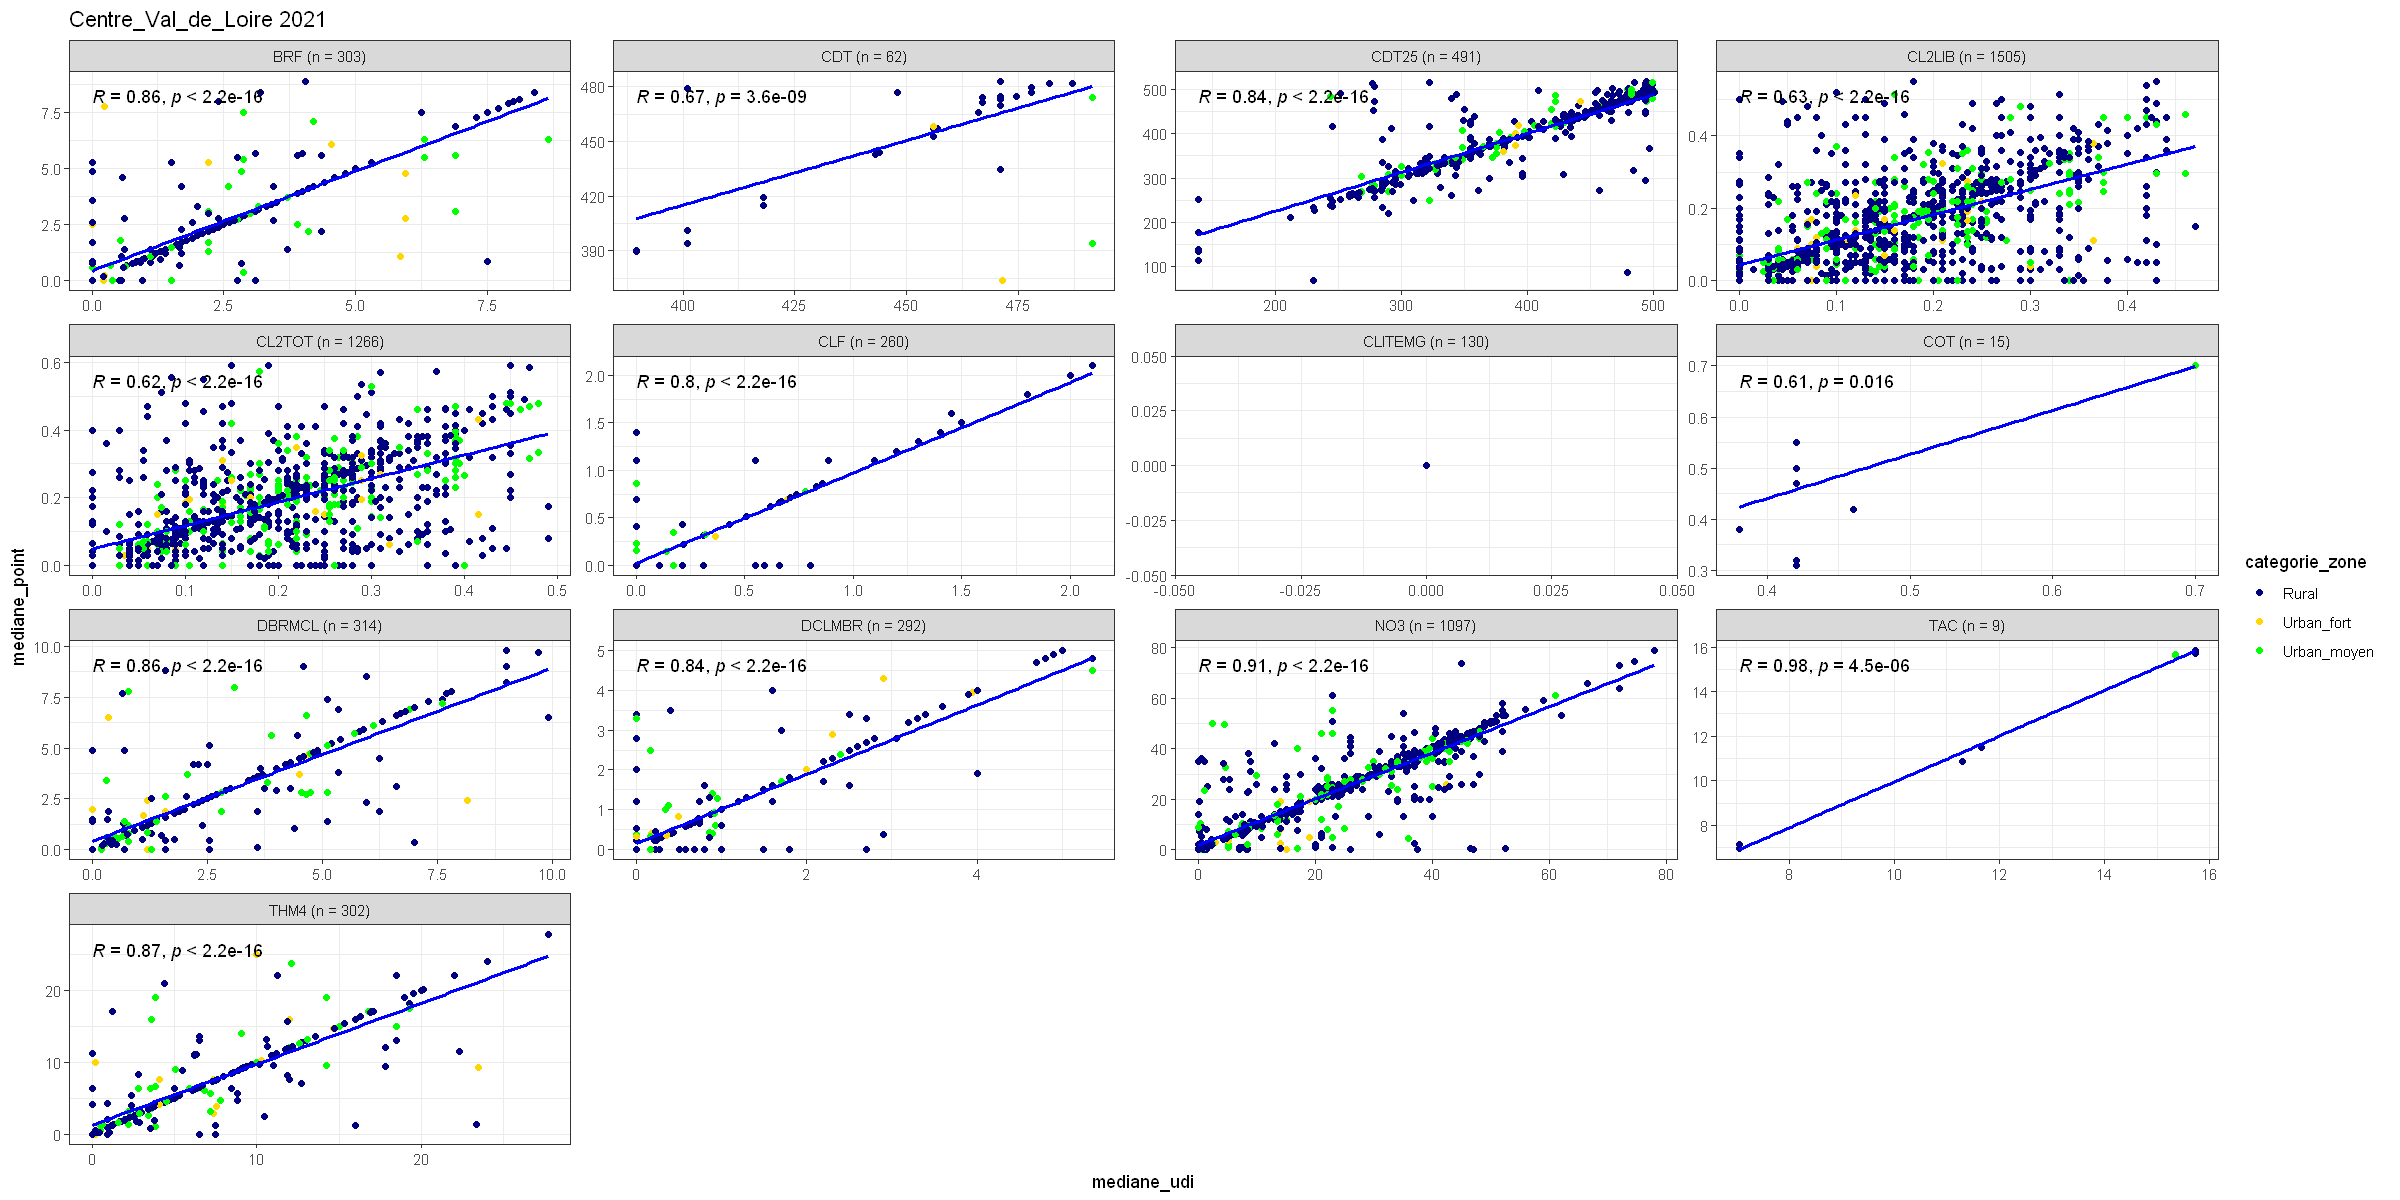

In [41]:
print("Region Centre_Val_de_Loire sans outliers")
all_graphes_sans_outliers[[4]]


<div style="background-color:olivedrab; padding:10px">
<span style="color:white; font-weight:bold">Region Auvergne_Rhone_Alpes</span>
</div>

##### Avec outliers

[1] "Region Auvergne_Rhone_Alpes"


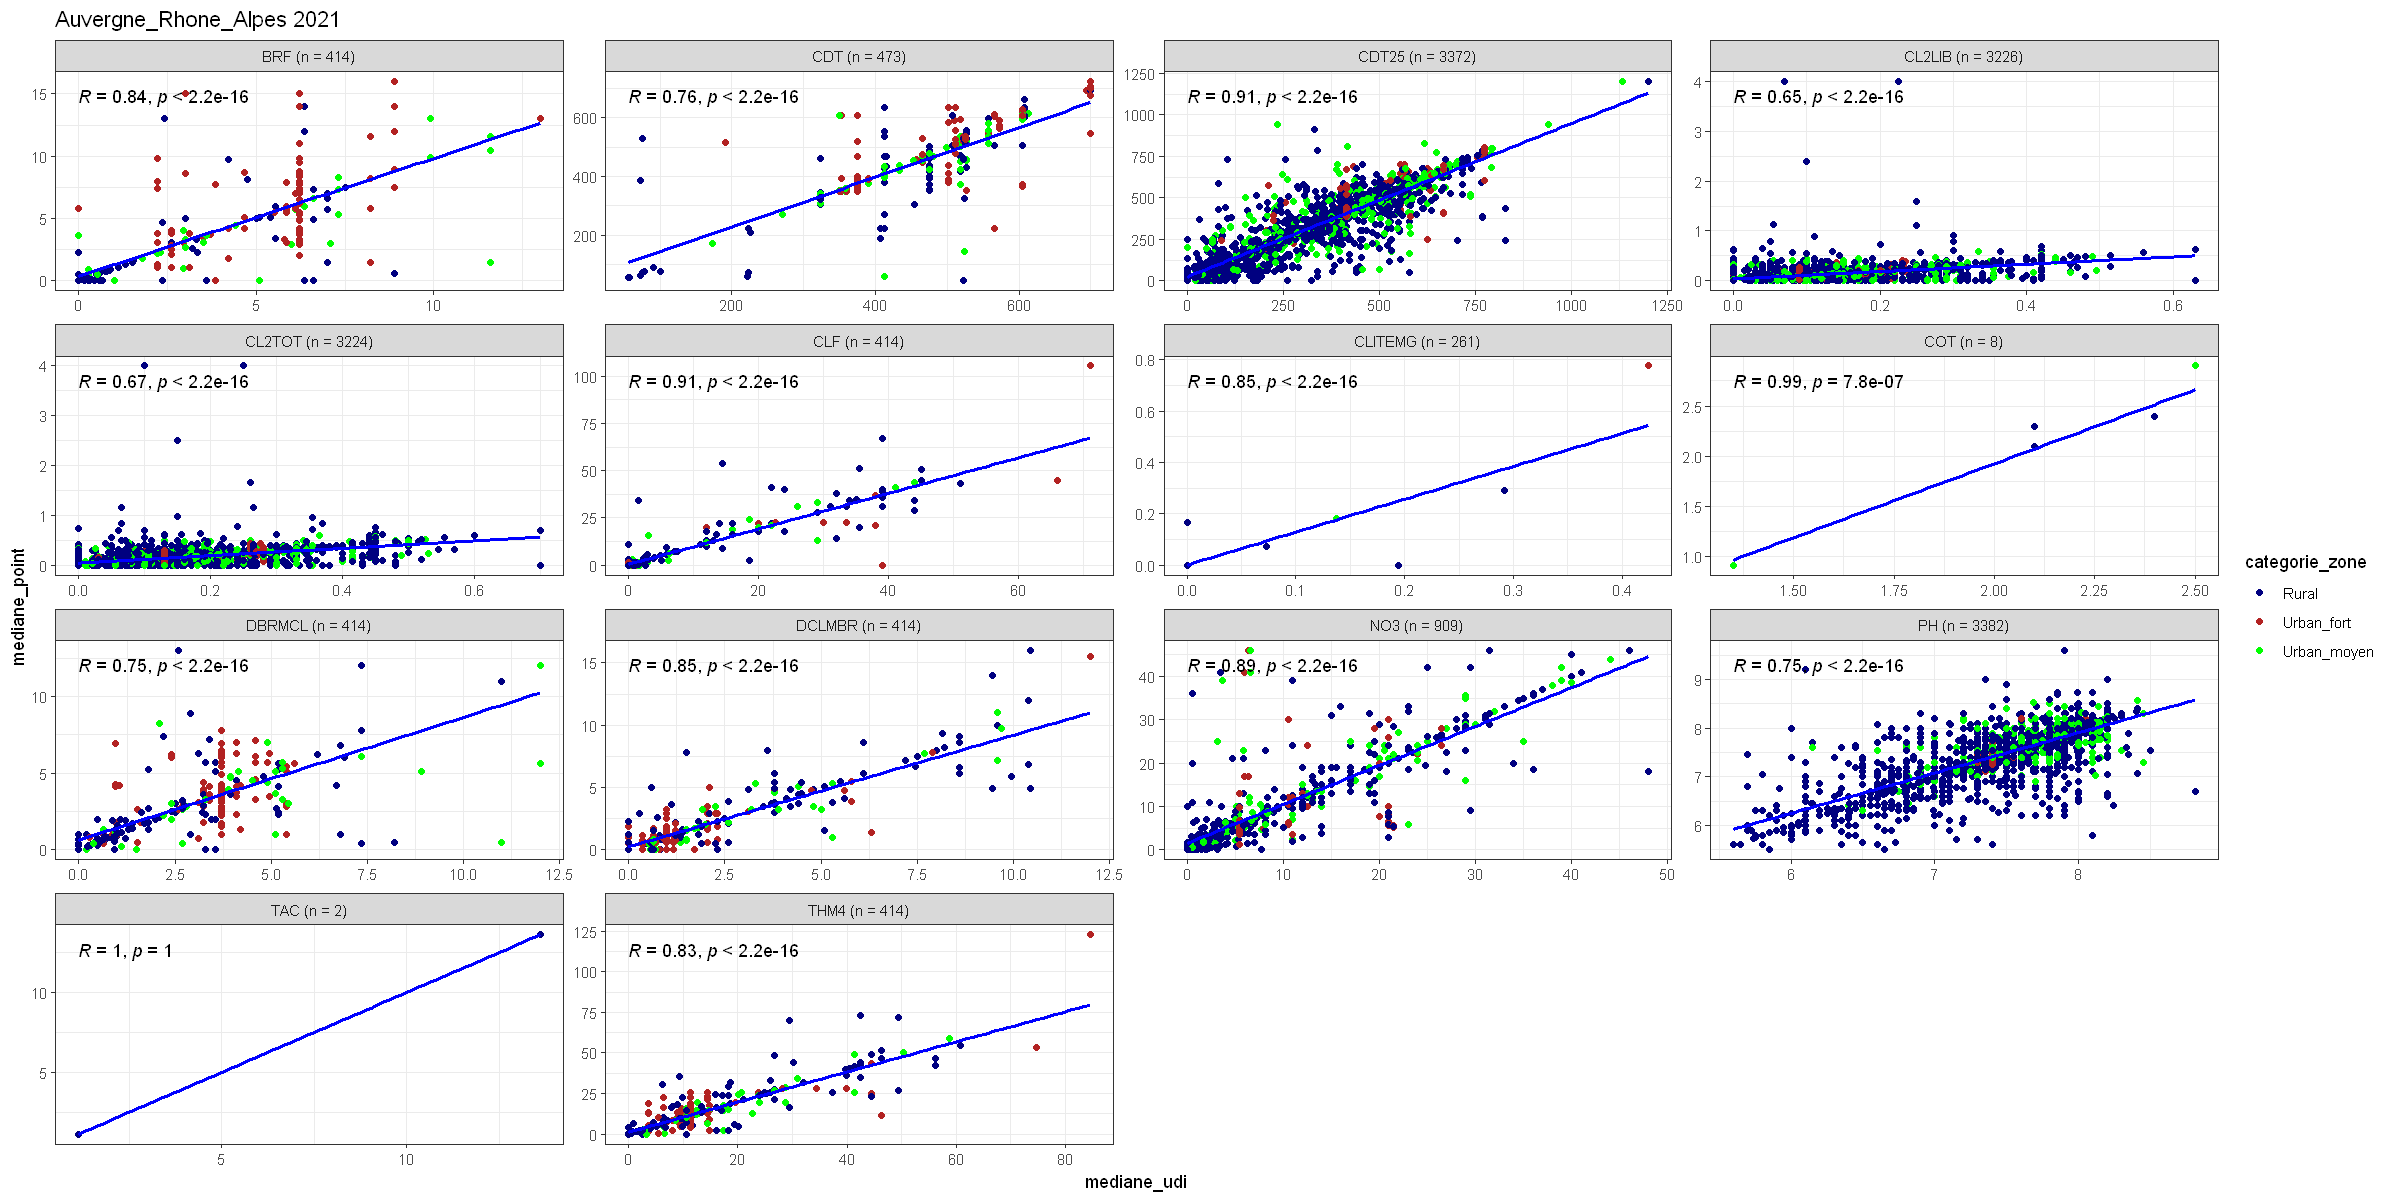

In [42]:
print("Region Auvergne_Rhone_Alpes")
all_graphes_avec_outliers[[5]]

##### Sans outliers

[1] "Region Auvergne_Rhone_Alpes sans outliers"


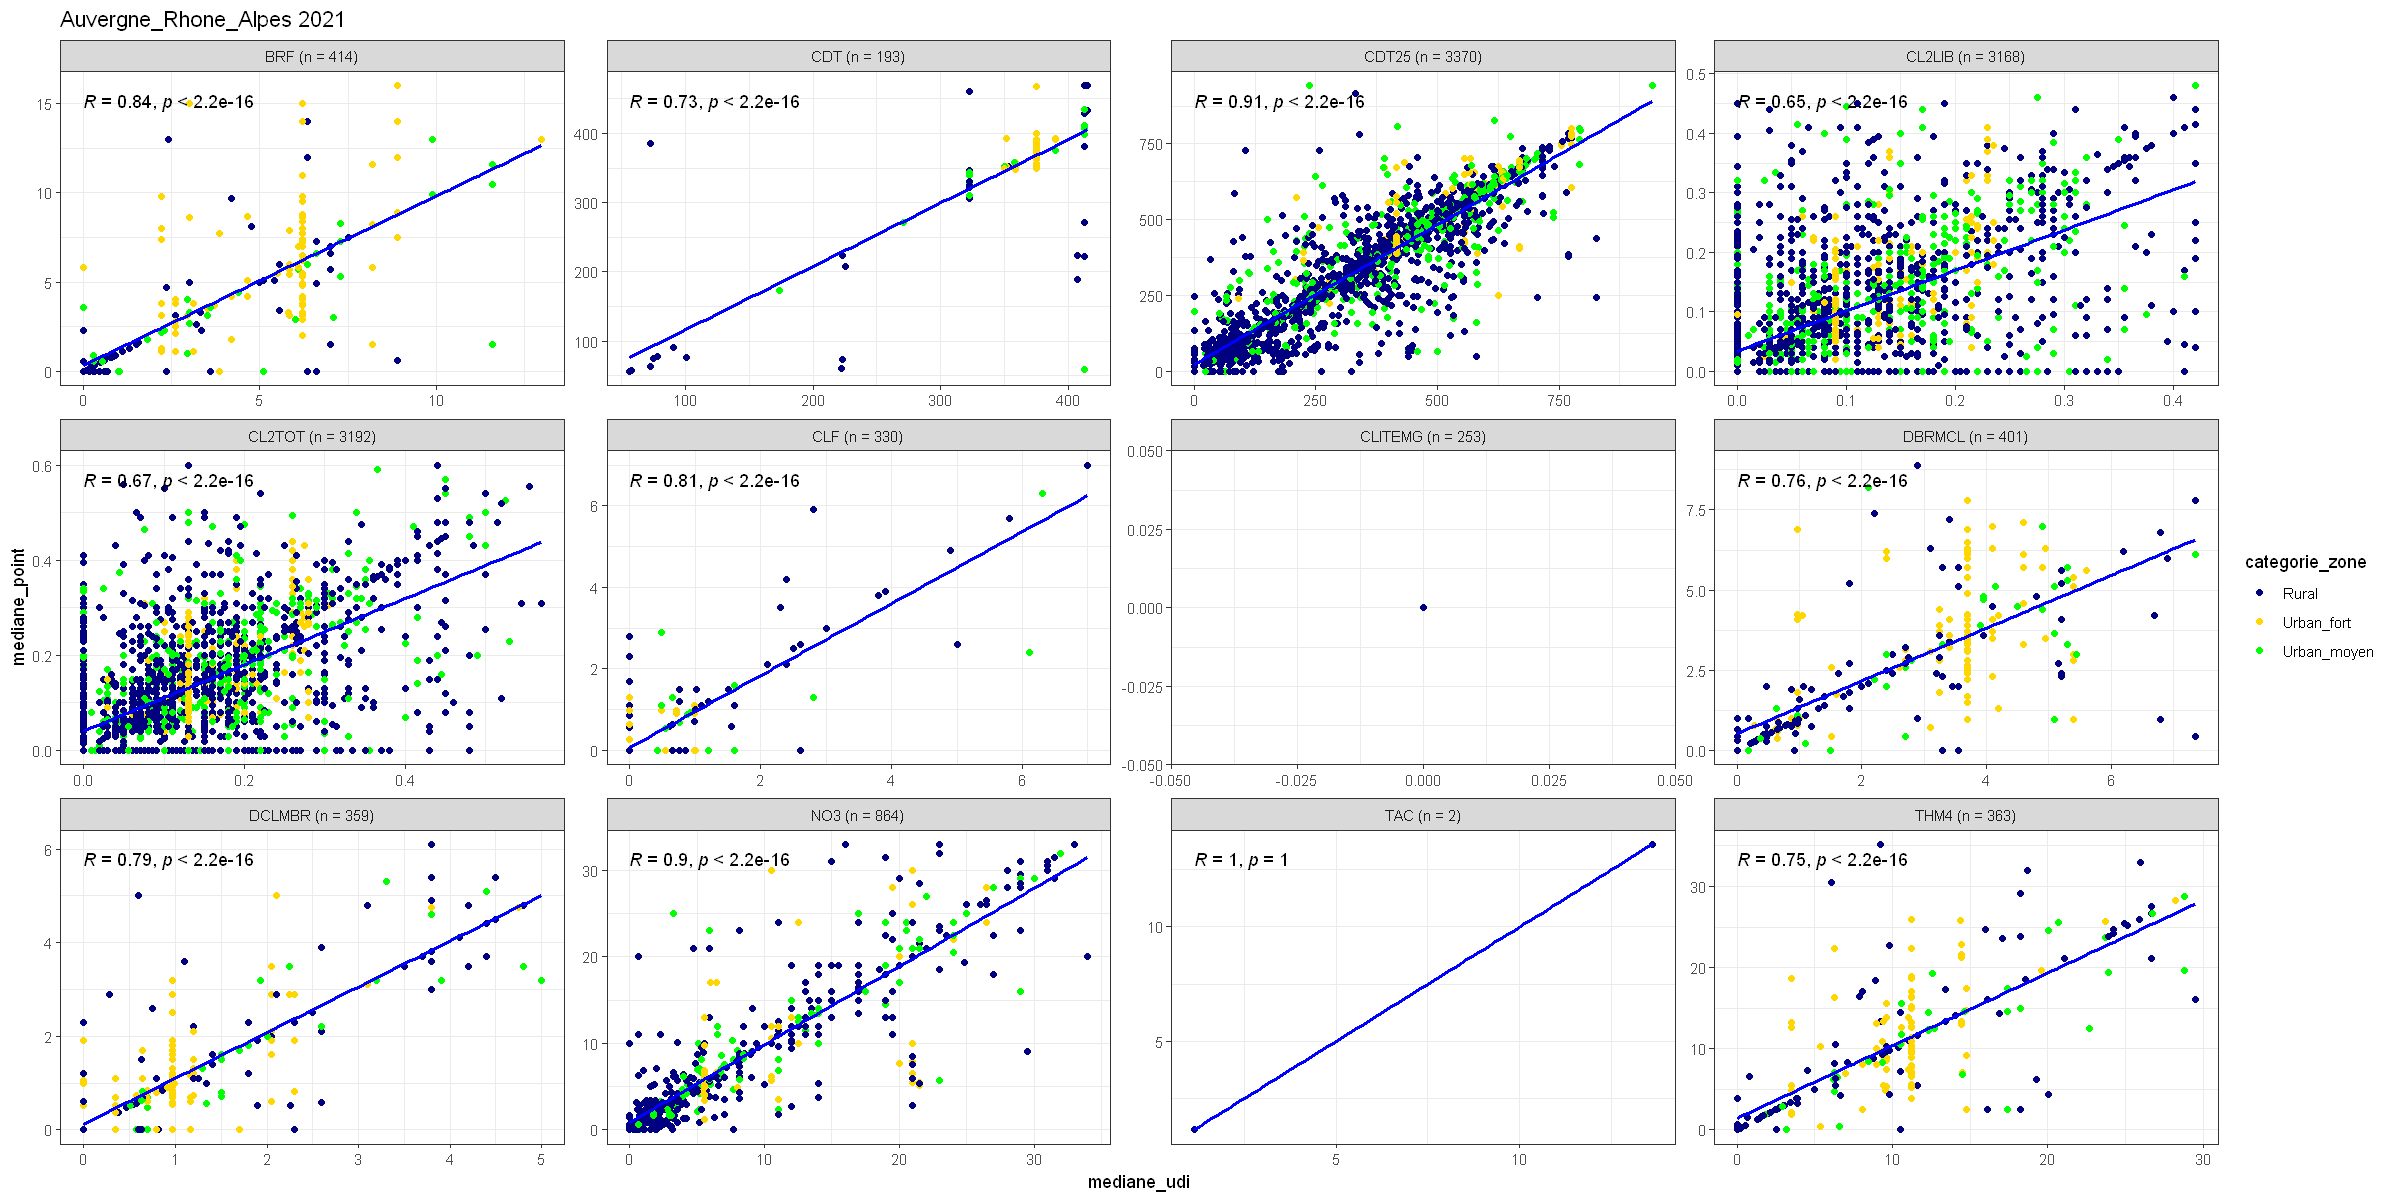

In [43]:
print("Region Auvergne_Rhone_Alpes sans outliers")
all_graphes_sans_outliers[[5]]


<div style="background-color:olivedrab; padding:10px">
<span style="color:white; font-weight:bold">Region Bourgogne_Franche_Comte</span>
</div>

##### Avec outliers

[1] "Region Bourgogne_Franche_Comte"


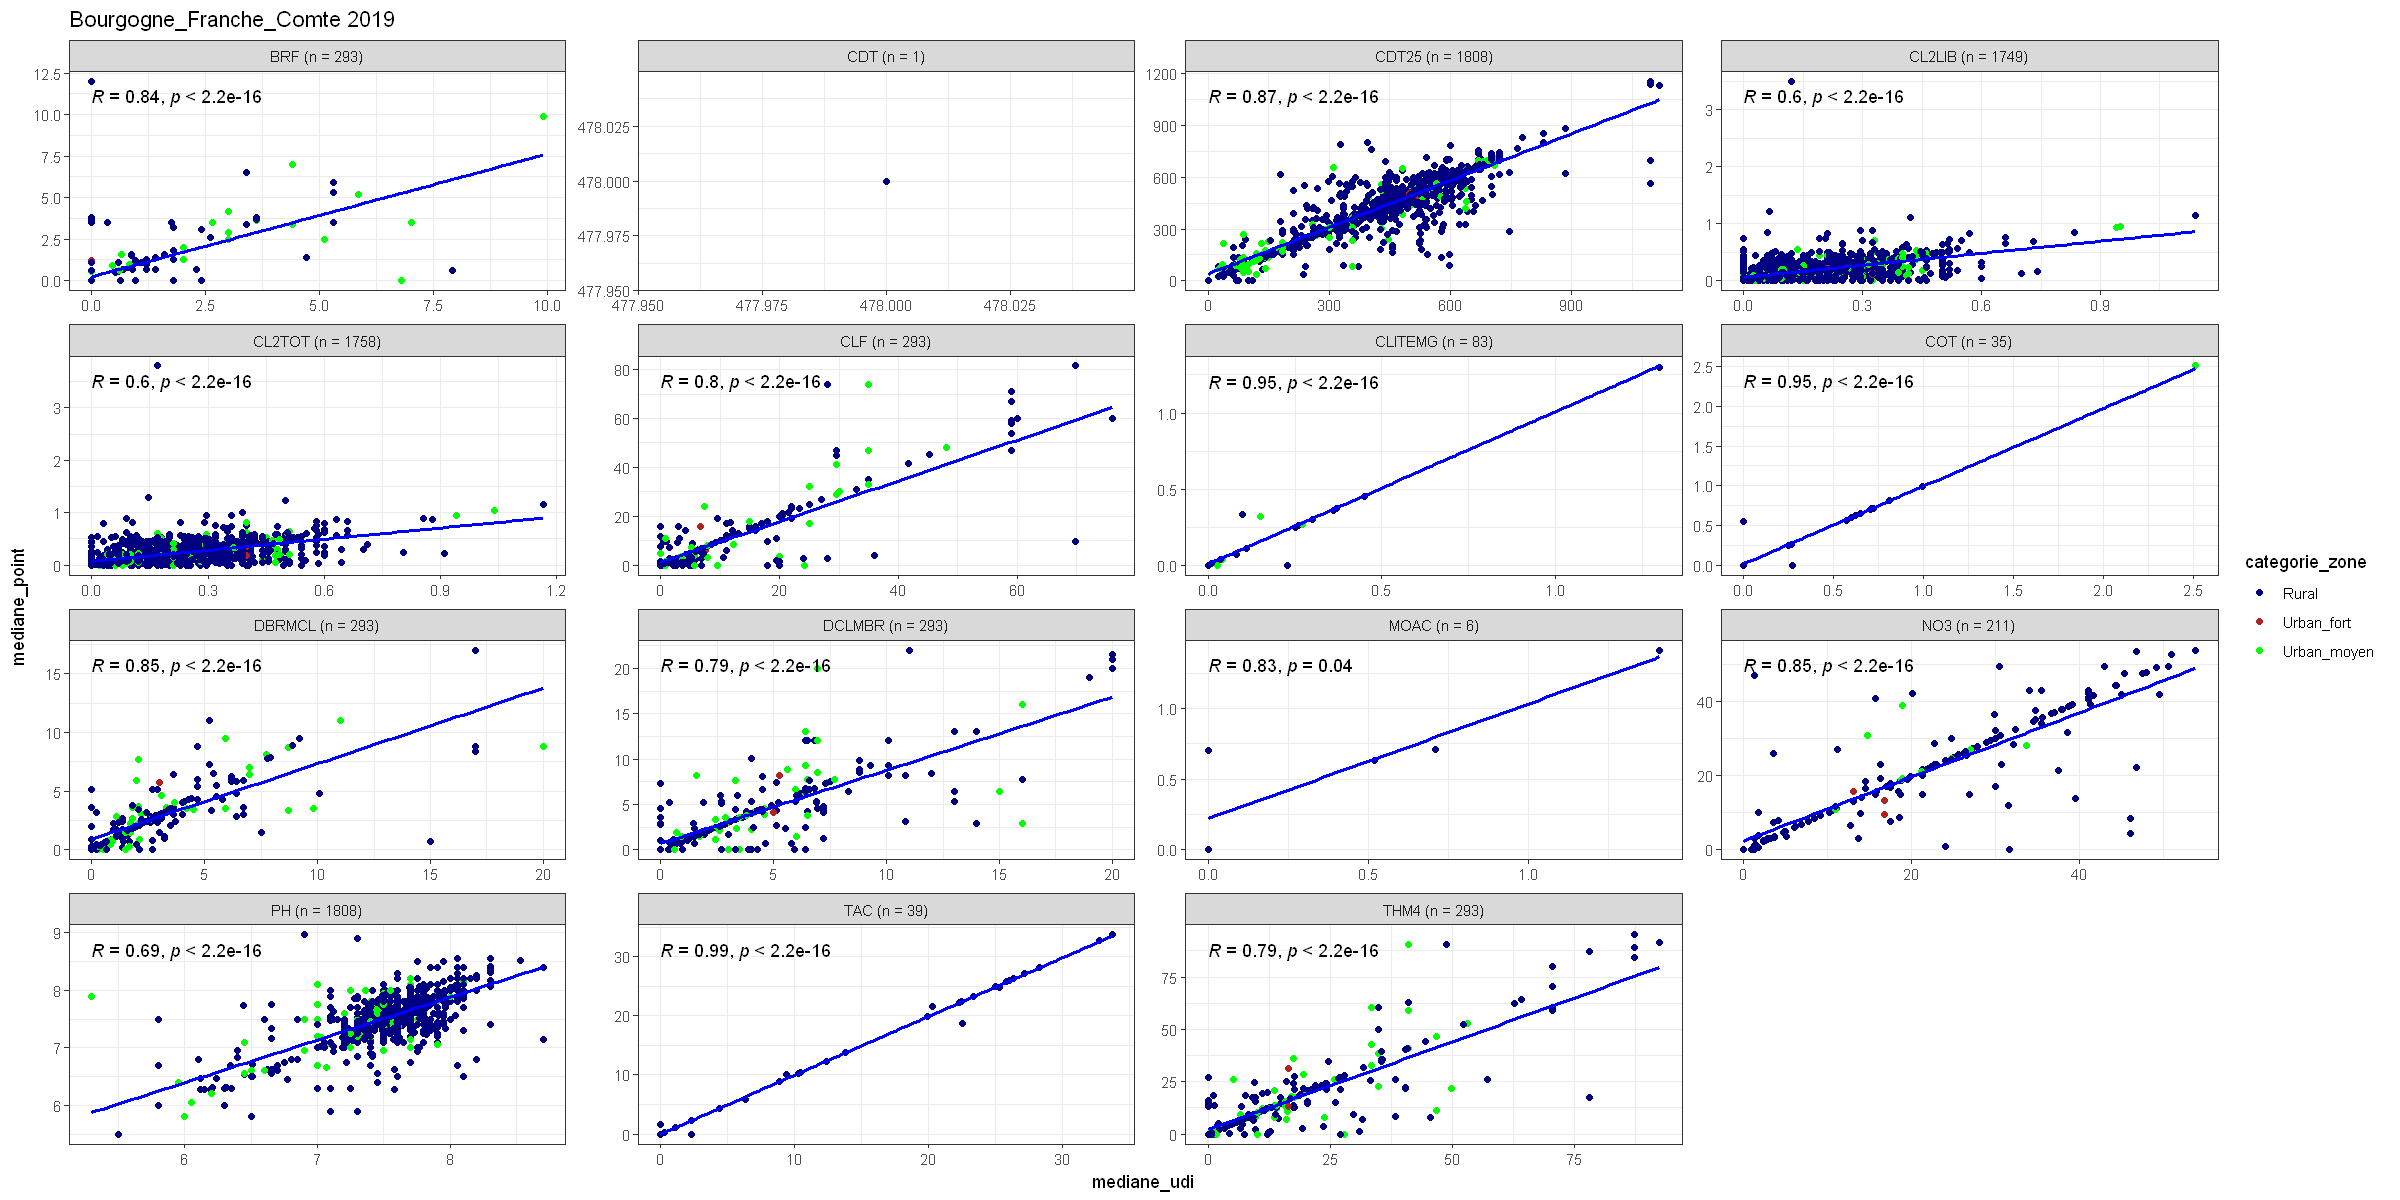

In [44]:
print("Region Bourgogne_Franche_Comte")
all_graphes_avec_outliers[[6]]

##### Sans outliers

[1] "Region Bourgogne_Franche_Comte sans outliers"


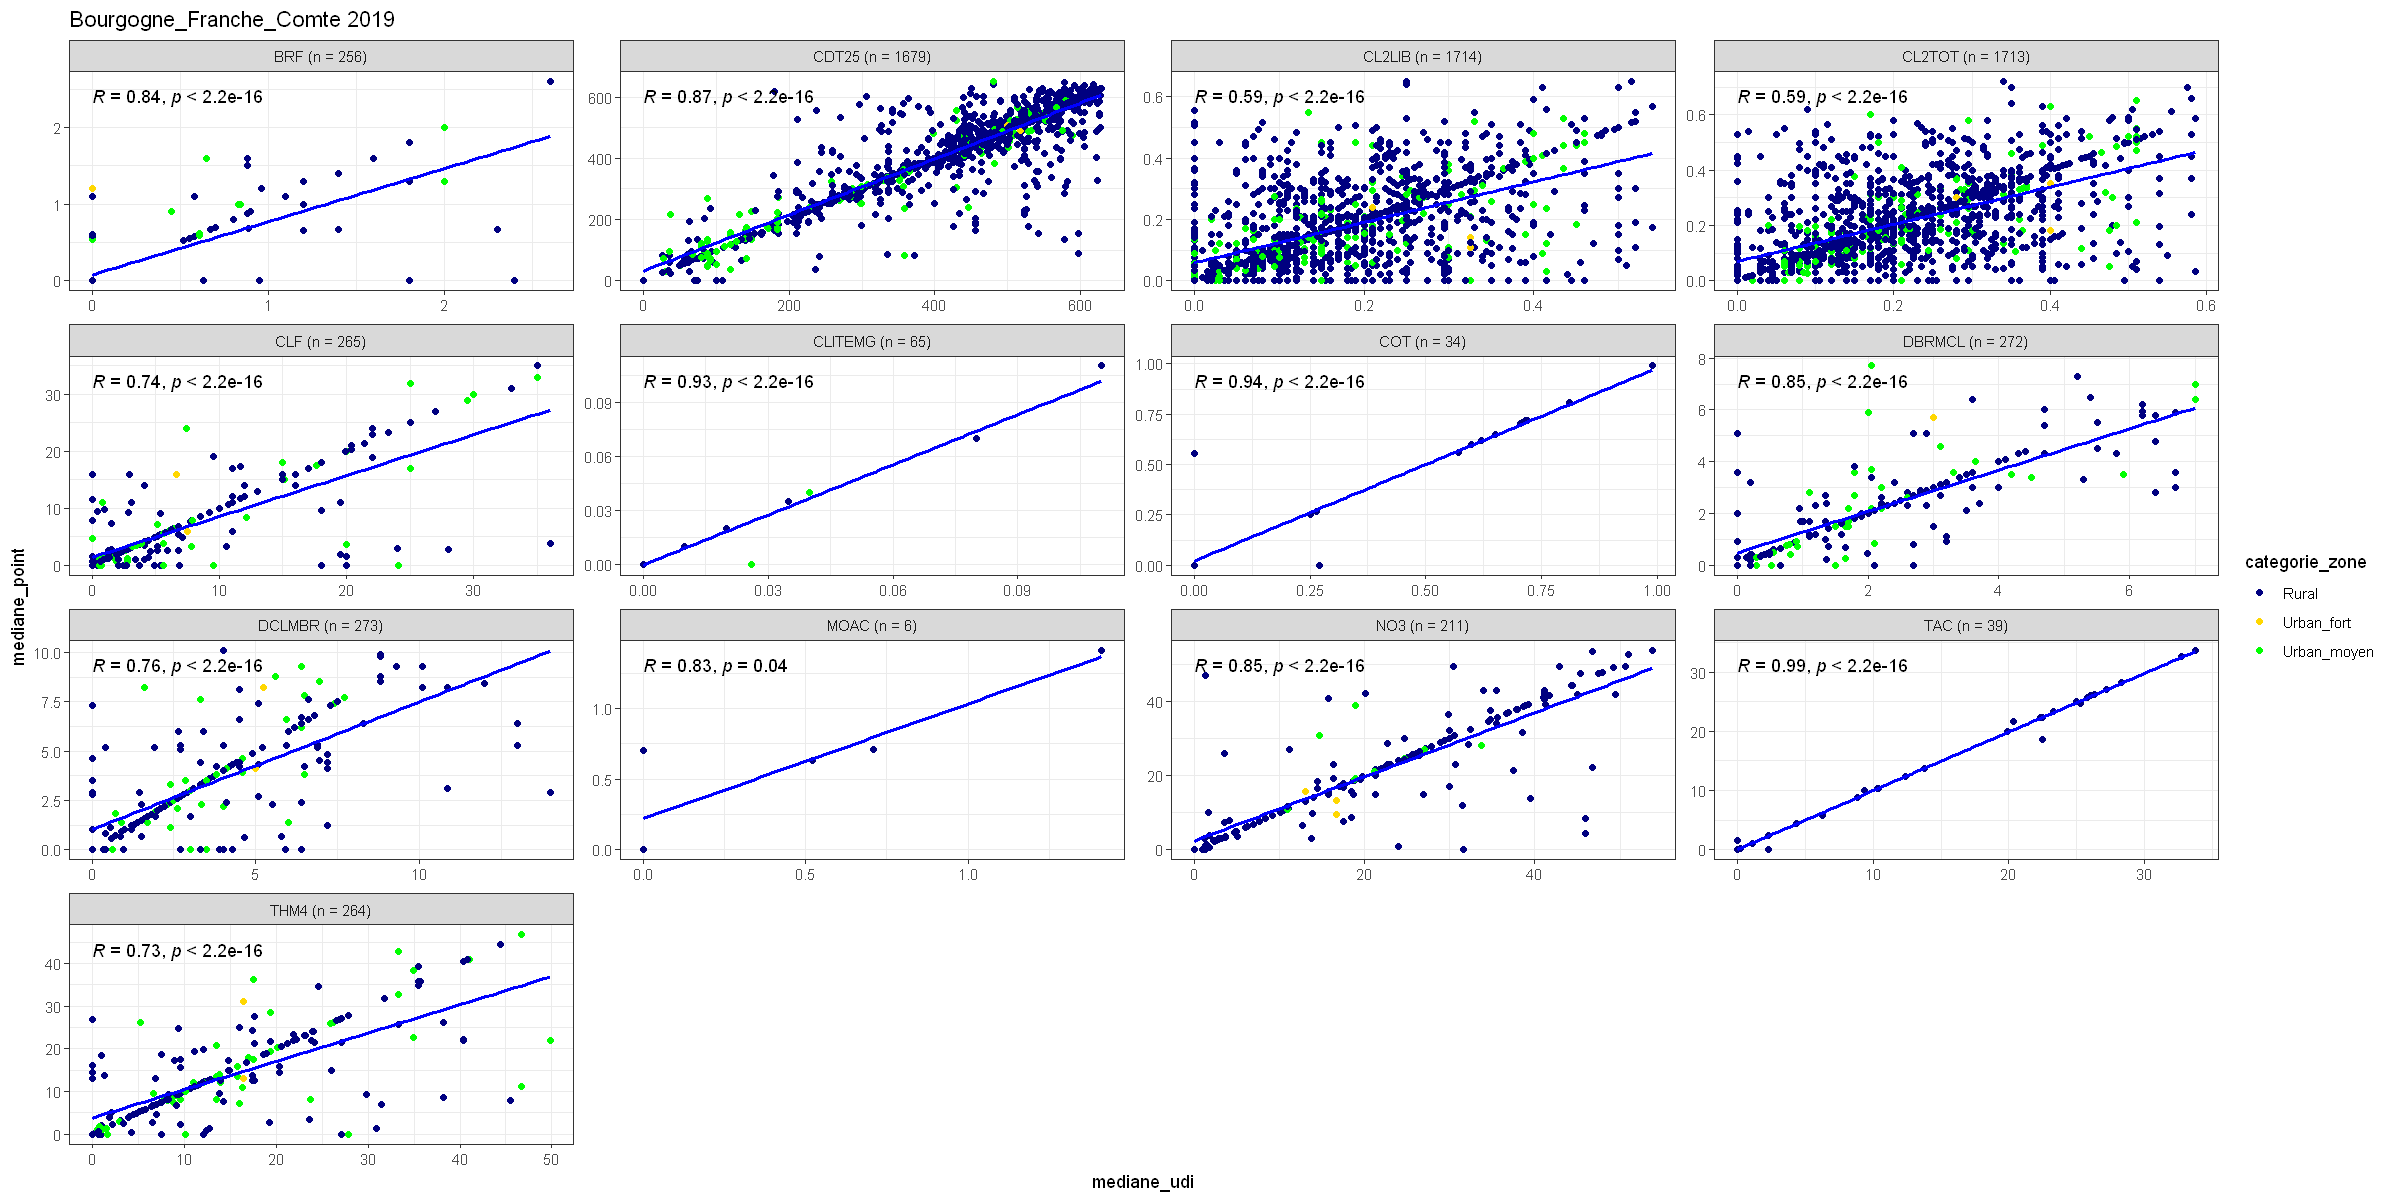

In [45]:
print("Region Bourgogne_Franche_Comte sans outliers")
all_graphes_sans_outliers[[6]]


<div style="background-color:olivedrab; padding:10px">
<span style="color:white; font-weight:bold">Region Normandie</span>
</div>

##### Avec outliers

[1] "Region Normandie"


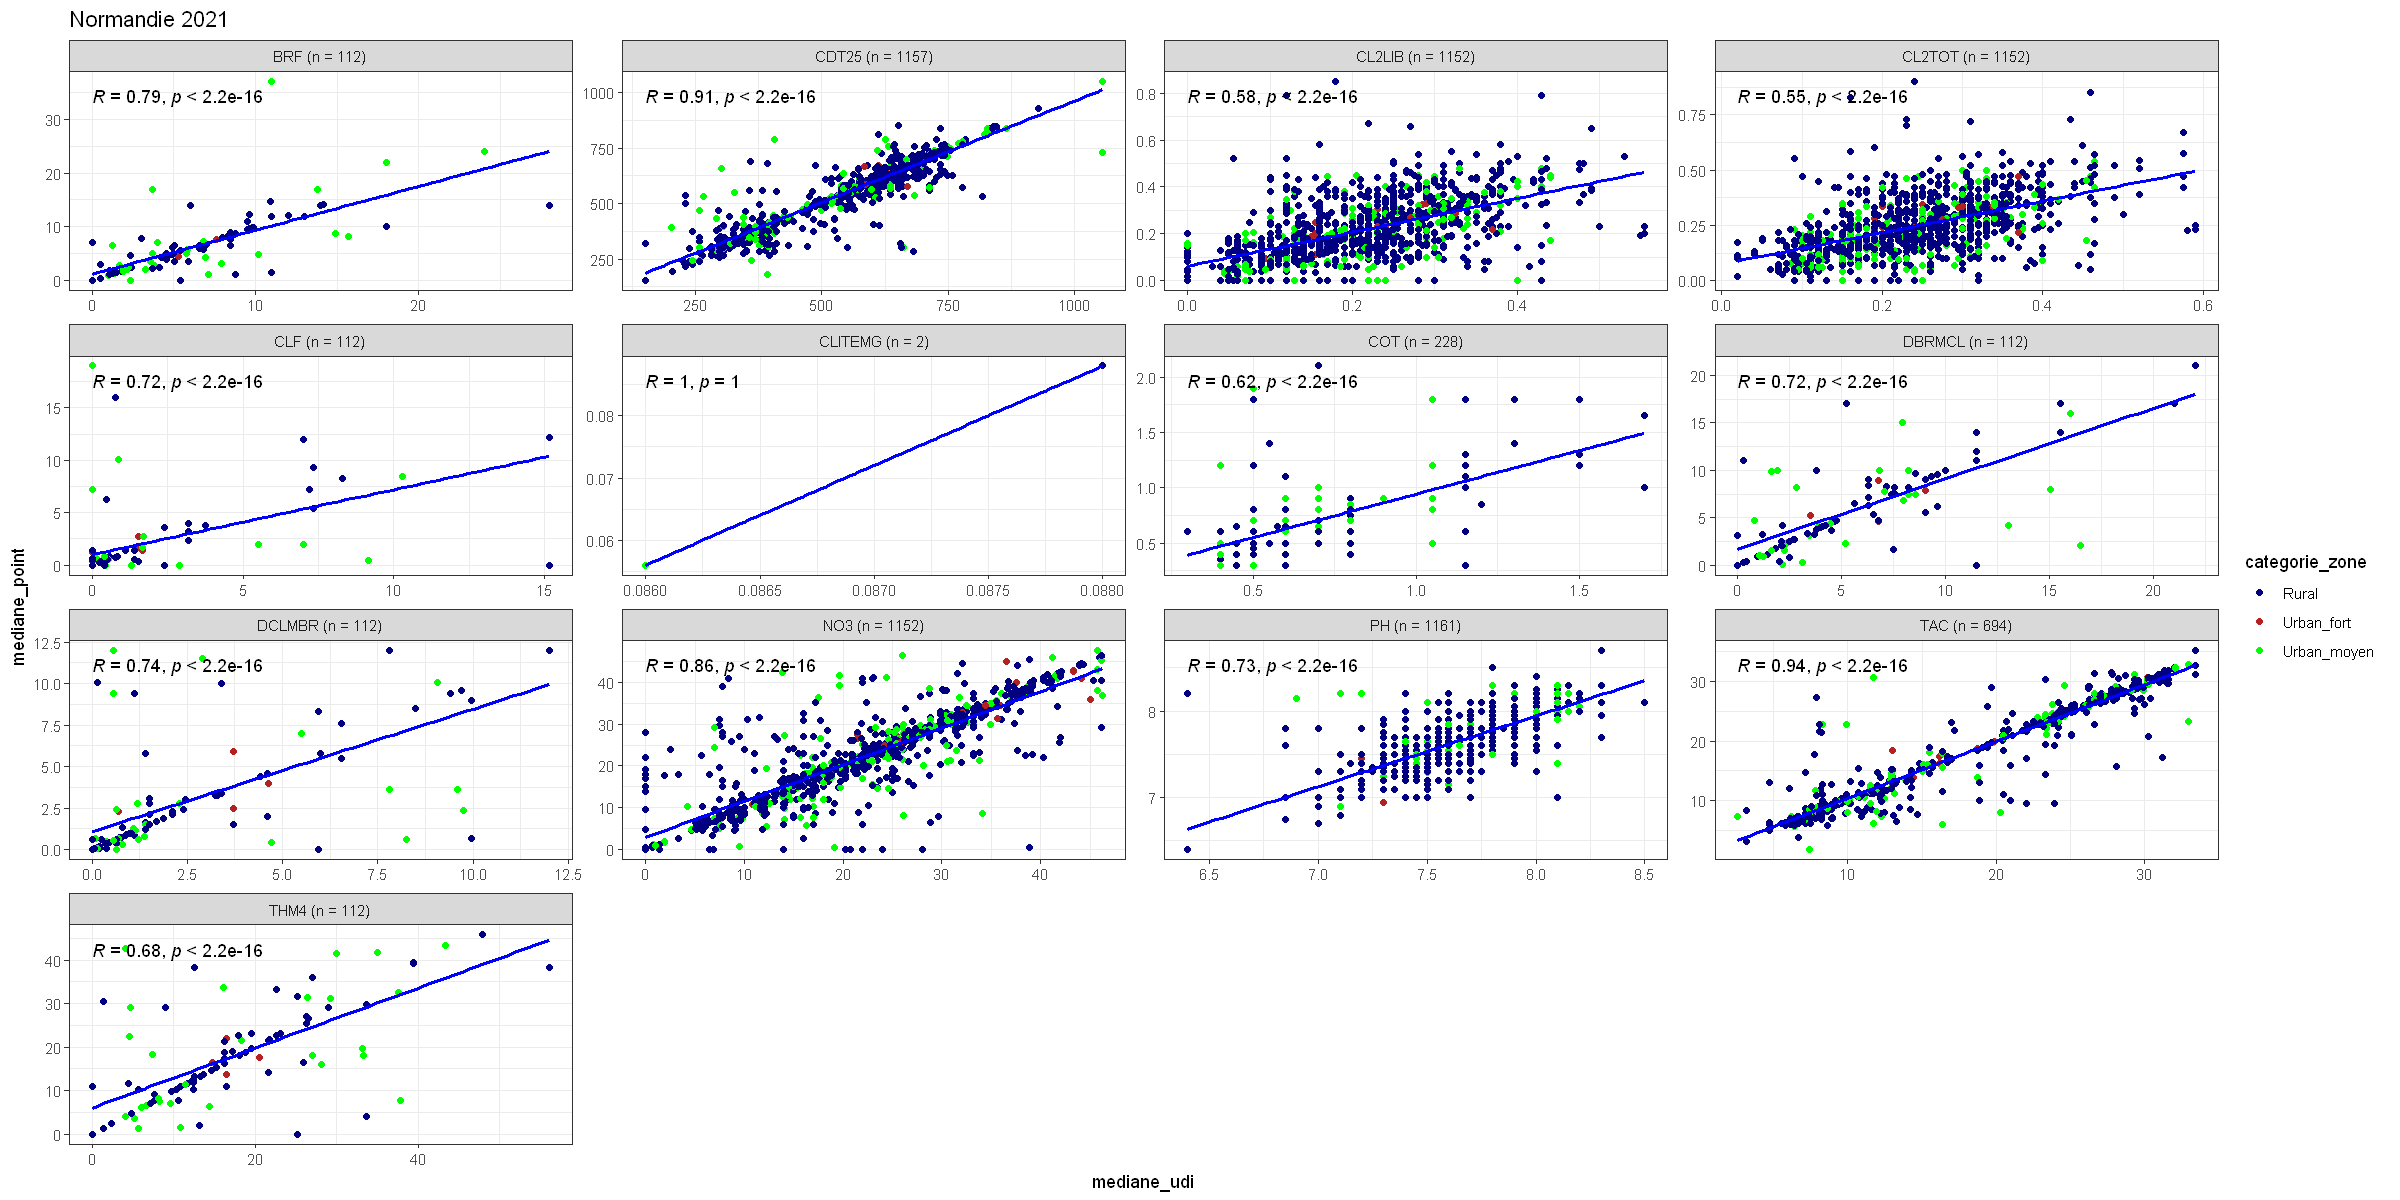

In [46]:
print("Region Normandie")
all_graphes_avec_outliers[[7]]

##### Sans outliers

[1] "Region Normandie sans outliers"


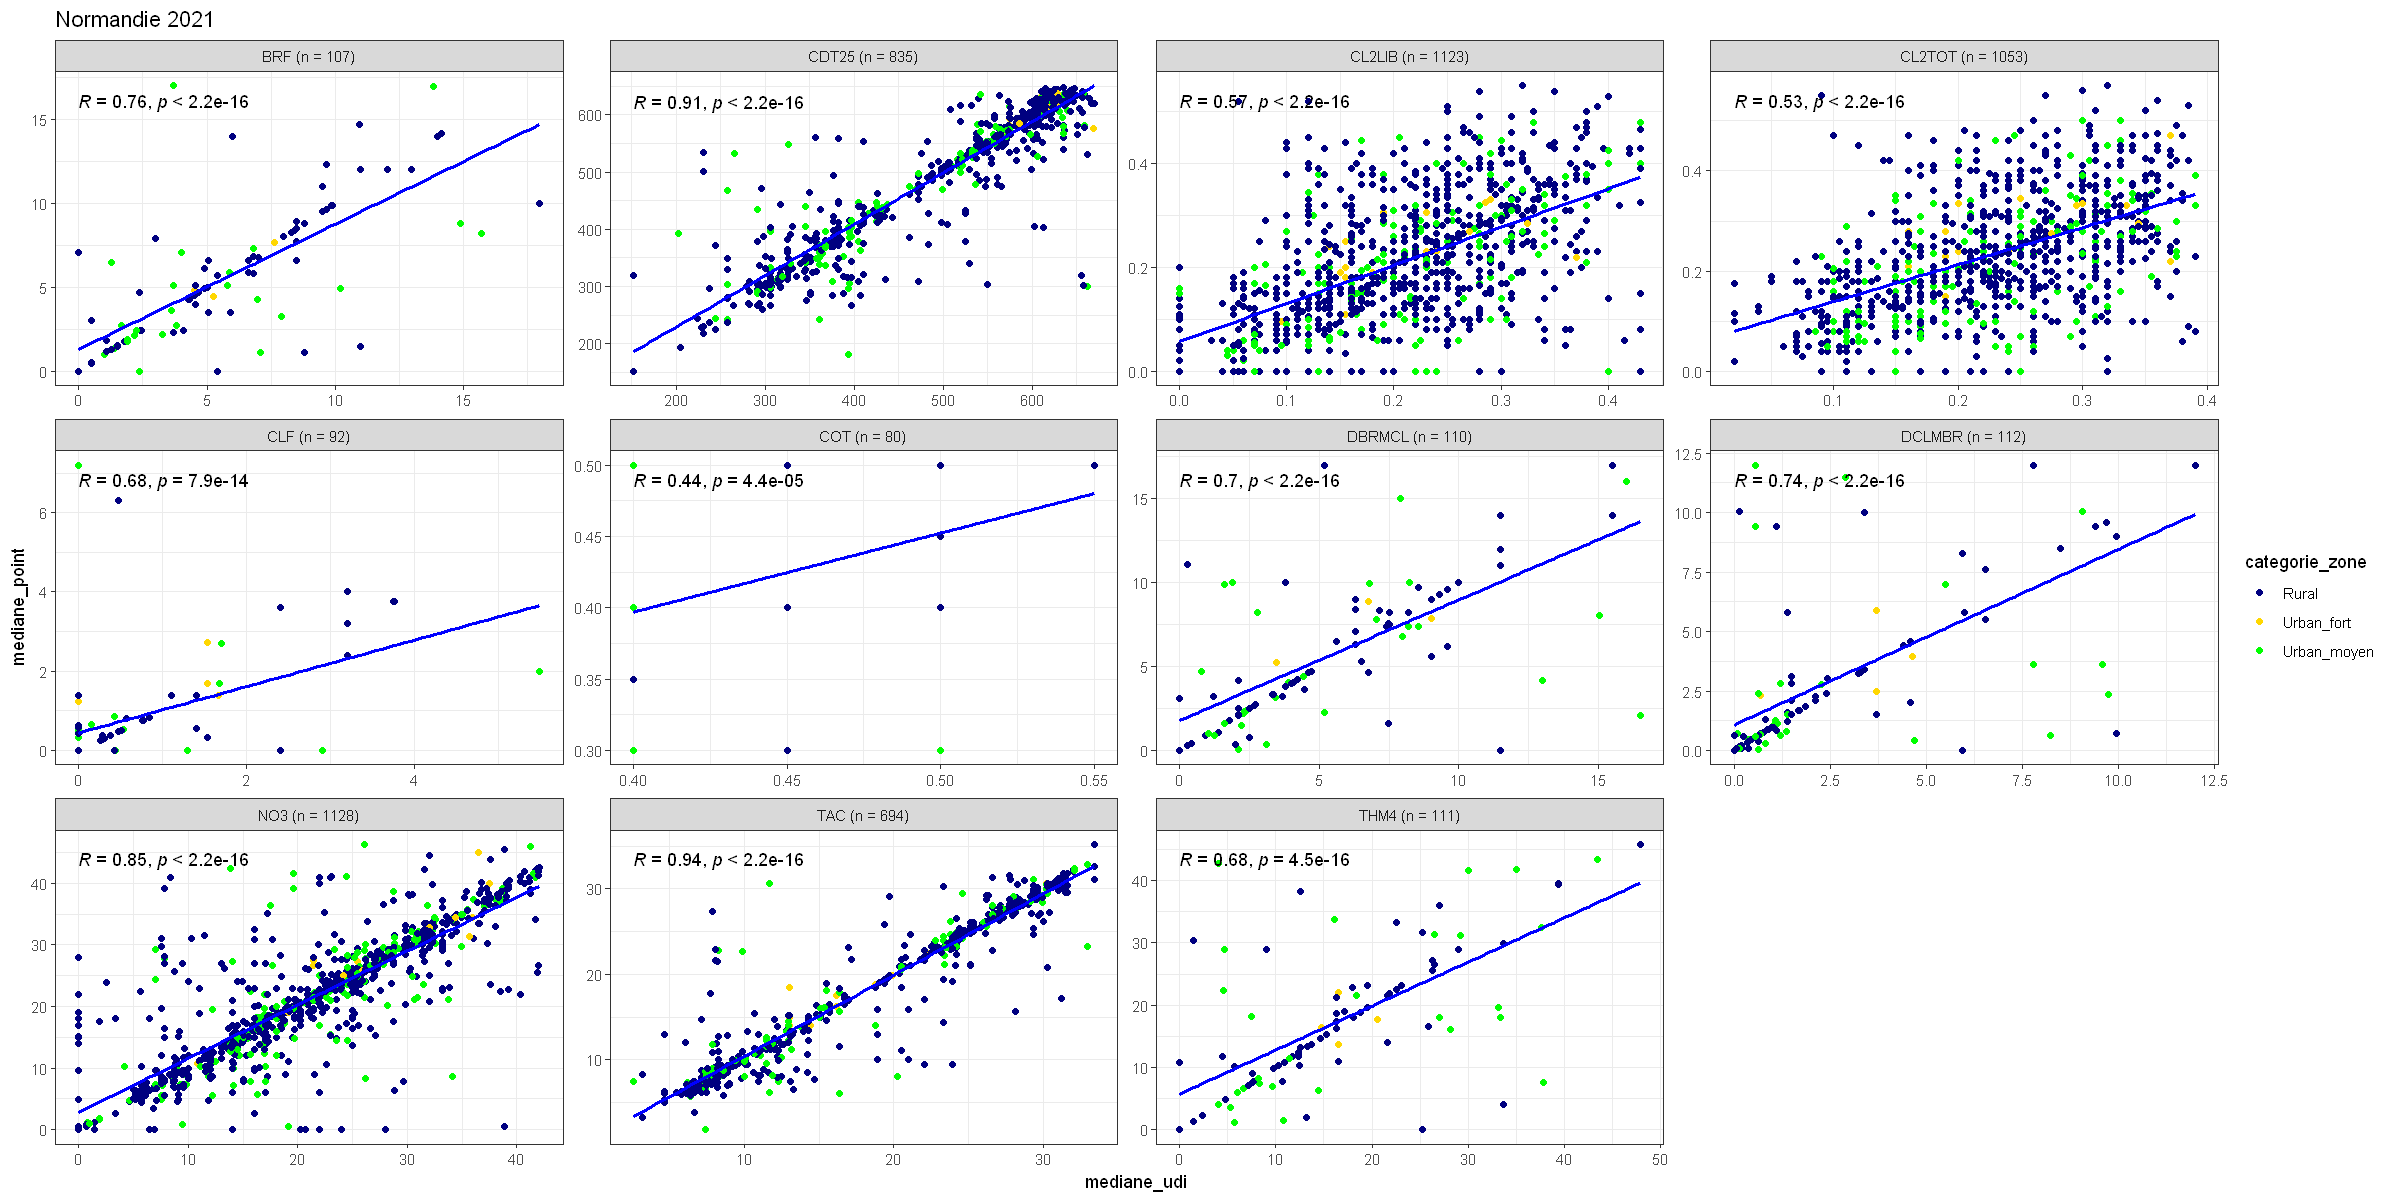

In [47]:
print("Region Normandie sans outliers")
all_graphes_sans_outliers[[7]]

En regardant les paramètres CL2LIB et CL2TOT, les points sont dispersés par rapport à la droite de régression. Cette dispersion suggère une faible concordance entre les deux méthodes, avec des écarts importants entre les valeurs mesurées. En revanche, pour les autres paramètres, les points sont étroitement regroupés autour de la droite de corrélation, ce qui indique une concordance élevée entre les deux méthodes pour ces paramètres.


En examinant la dispersion en fonction de la densité de population, pour le cas de la Normandie. On constate que les points correspondant aux zones urbaines fortement peuplées (représentés en jaune) sont plus proches de la droite de régression, indiquant une plus grande concordance entre les deux méthodes. Les points correspondant aux zones urbaines moyennement peuplées (représentés en vert) montrent également une proximité avec la droite de régression, mais avec une légère dispersion. En revanche, dans les zones rurales (représentées en bleu), on observe une plus grande disparité entre les valeurs mesurées des deux méthodes. Par conséquent, les résultats suggèrent que les deux méthodes sont plus concordantes en zone urbaine et semi-urbaine qu'en zone rurale.



<div style="background-color:olivedrab; padding:10px">
<span style="color:white; font-weight:bold">Region Occitanie</span>
</div>

##### Avec outliers

[1] "Region Occitanie"


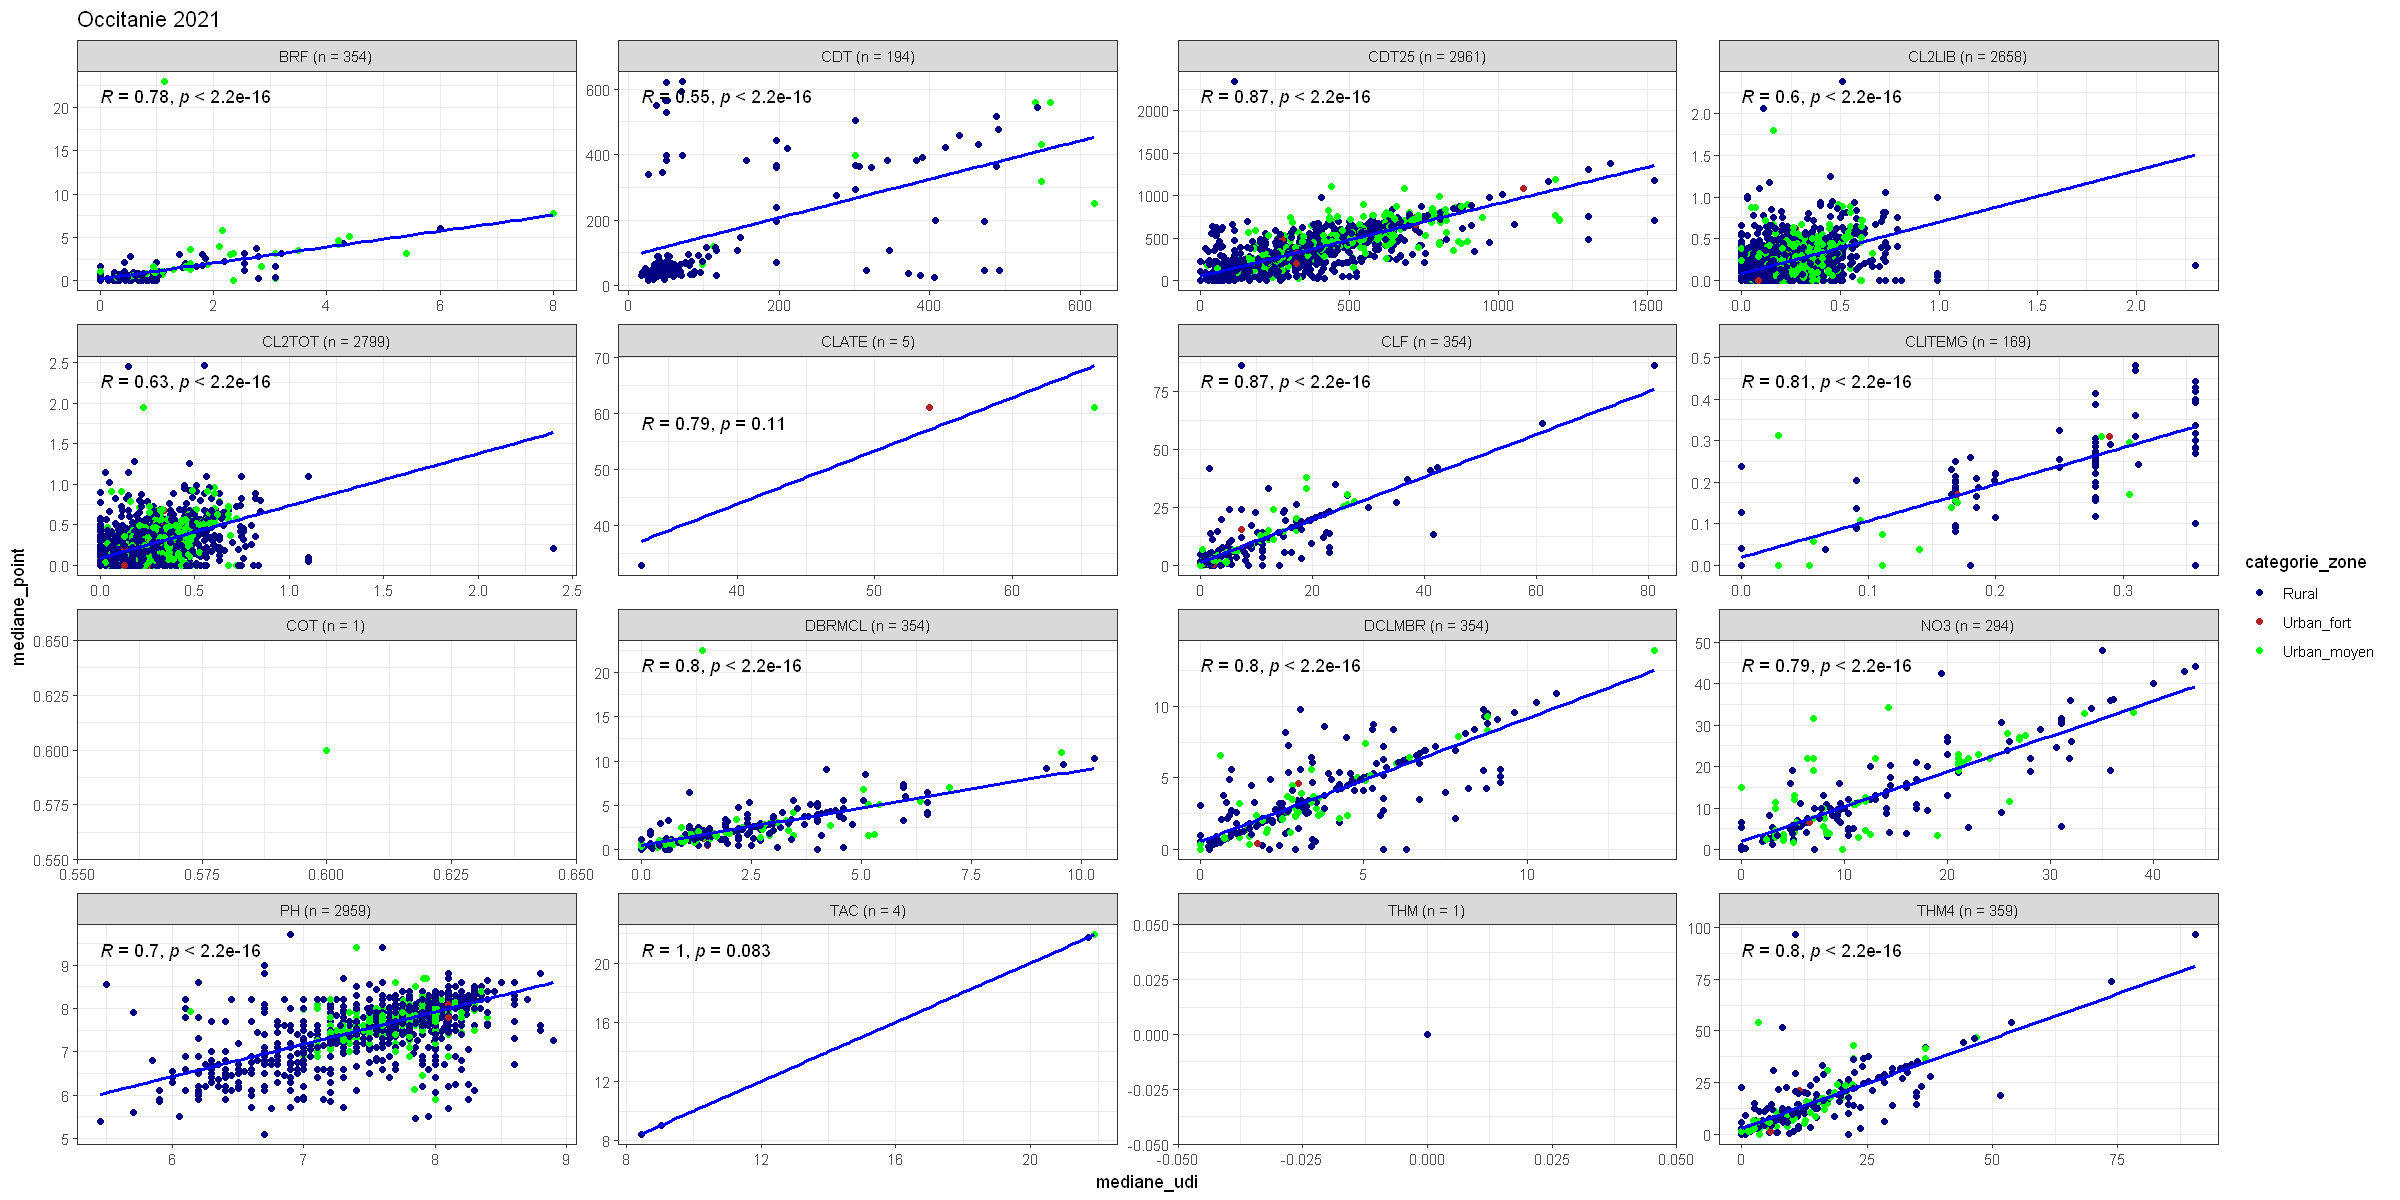

In [48]:
print("Region Occitanie")
all_graphes_avec_outliers[[8]]

##### Sans outliers

[1] "Region Occitanie sans outliers"


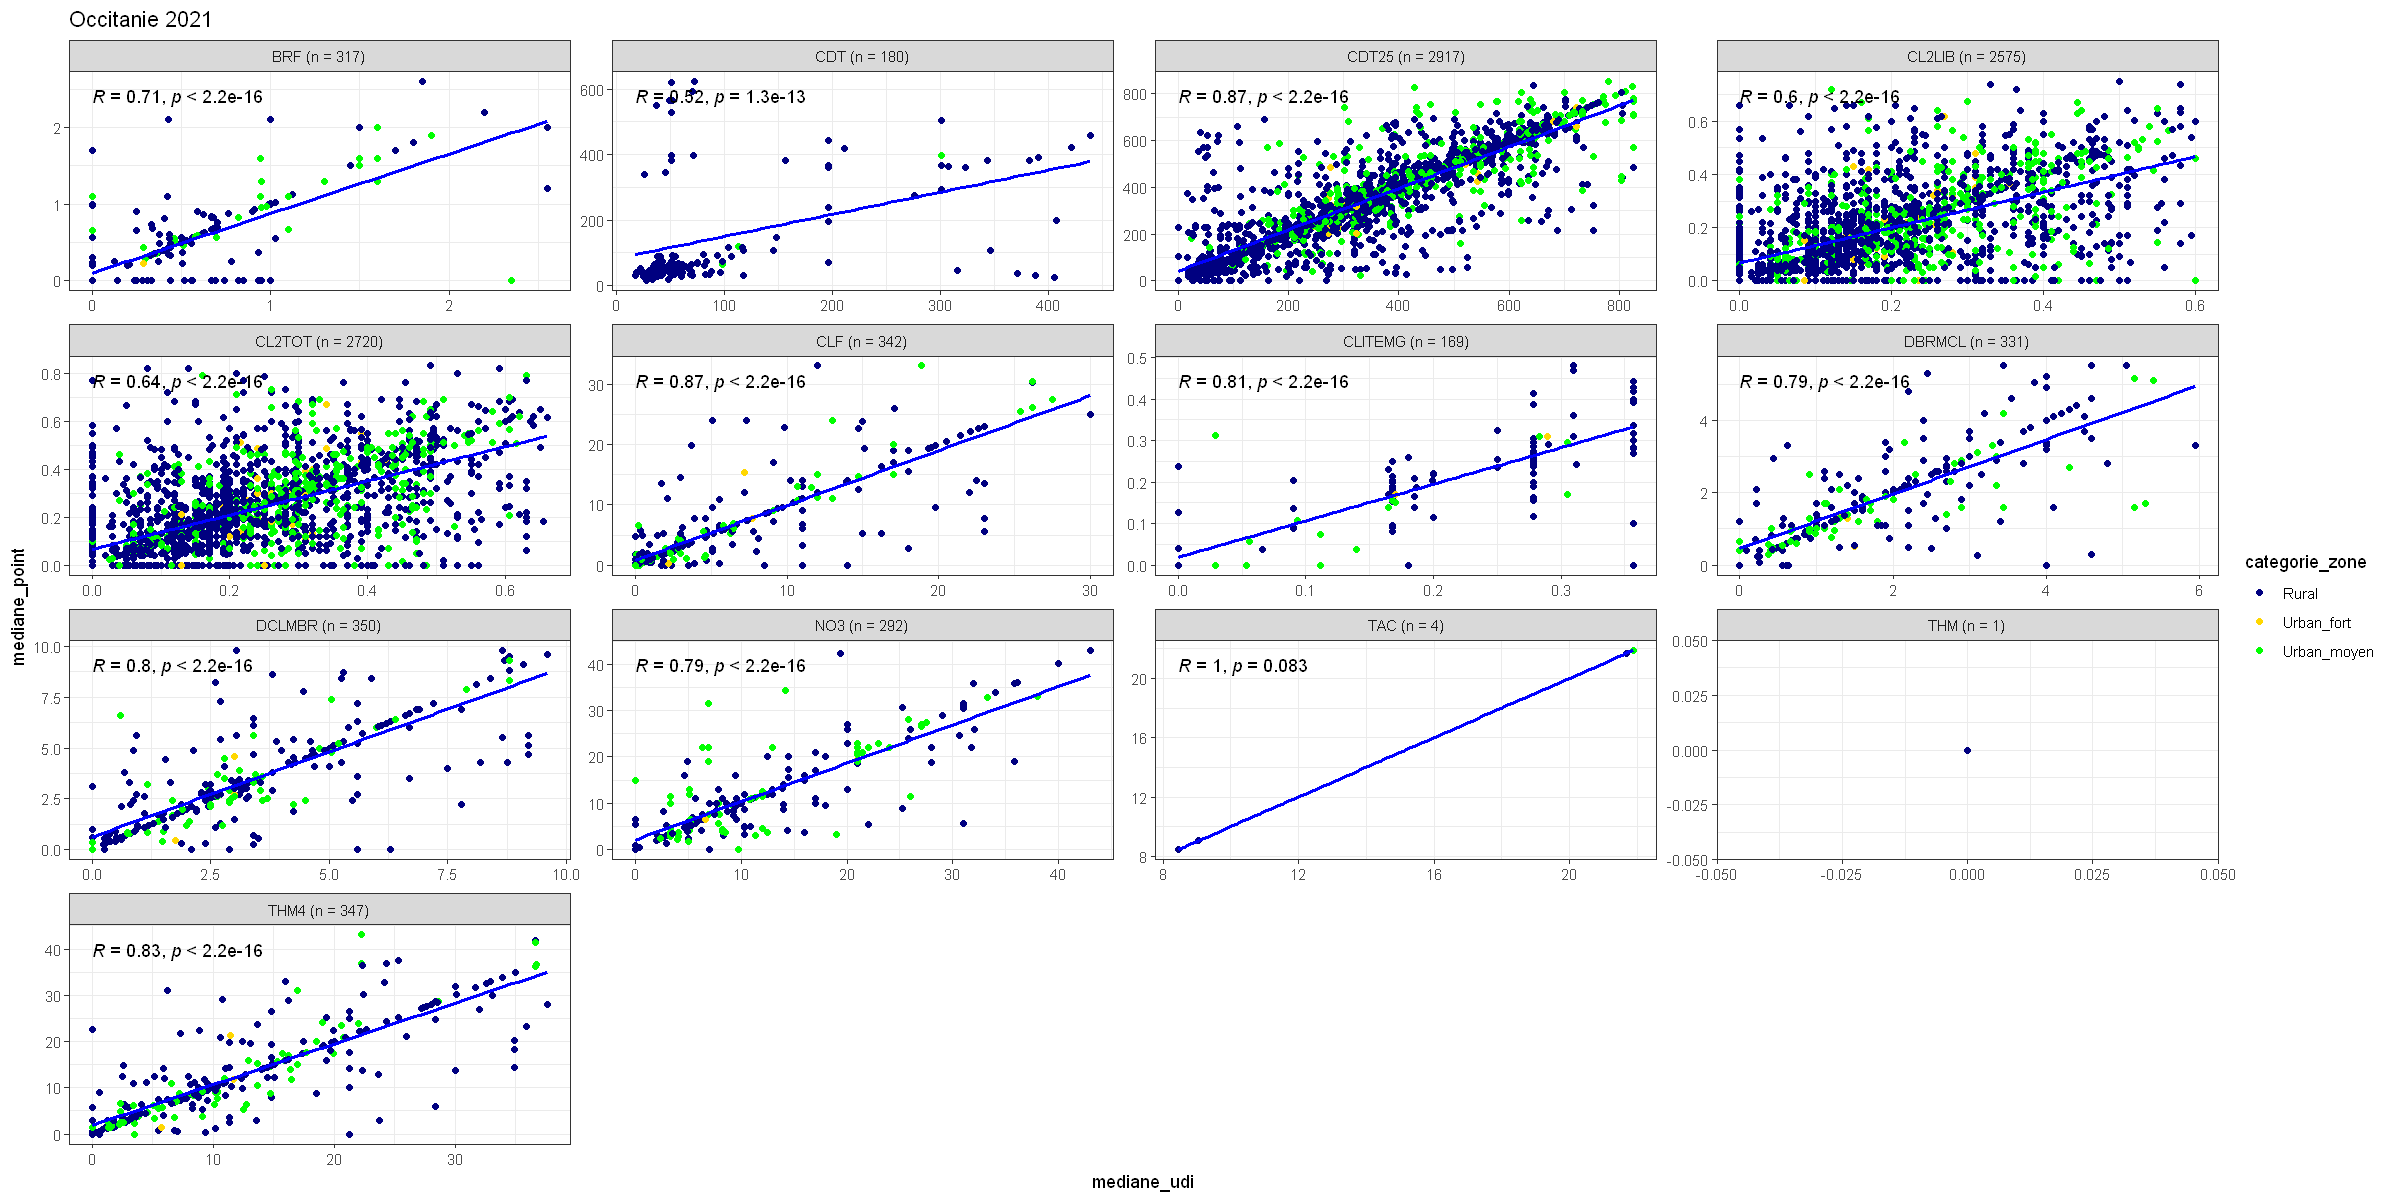

In [49]:
print("Region Occitanie sans outliers")
all_graphes_sans_outliers[[8]]


<div style="background-color:olivedrab; padding:10px">
<span style="color:white; font-weight:bold">Region Pays_de_la_Loire</span>
</div>

##### Avec outliers

[1] "Region Pays_de_la_Loire"


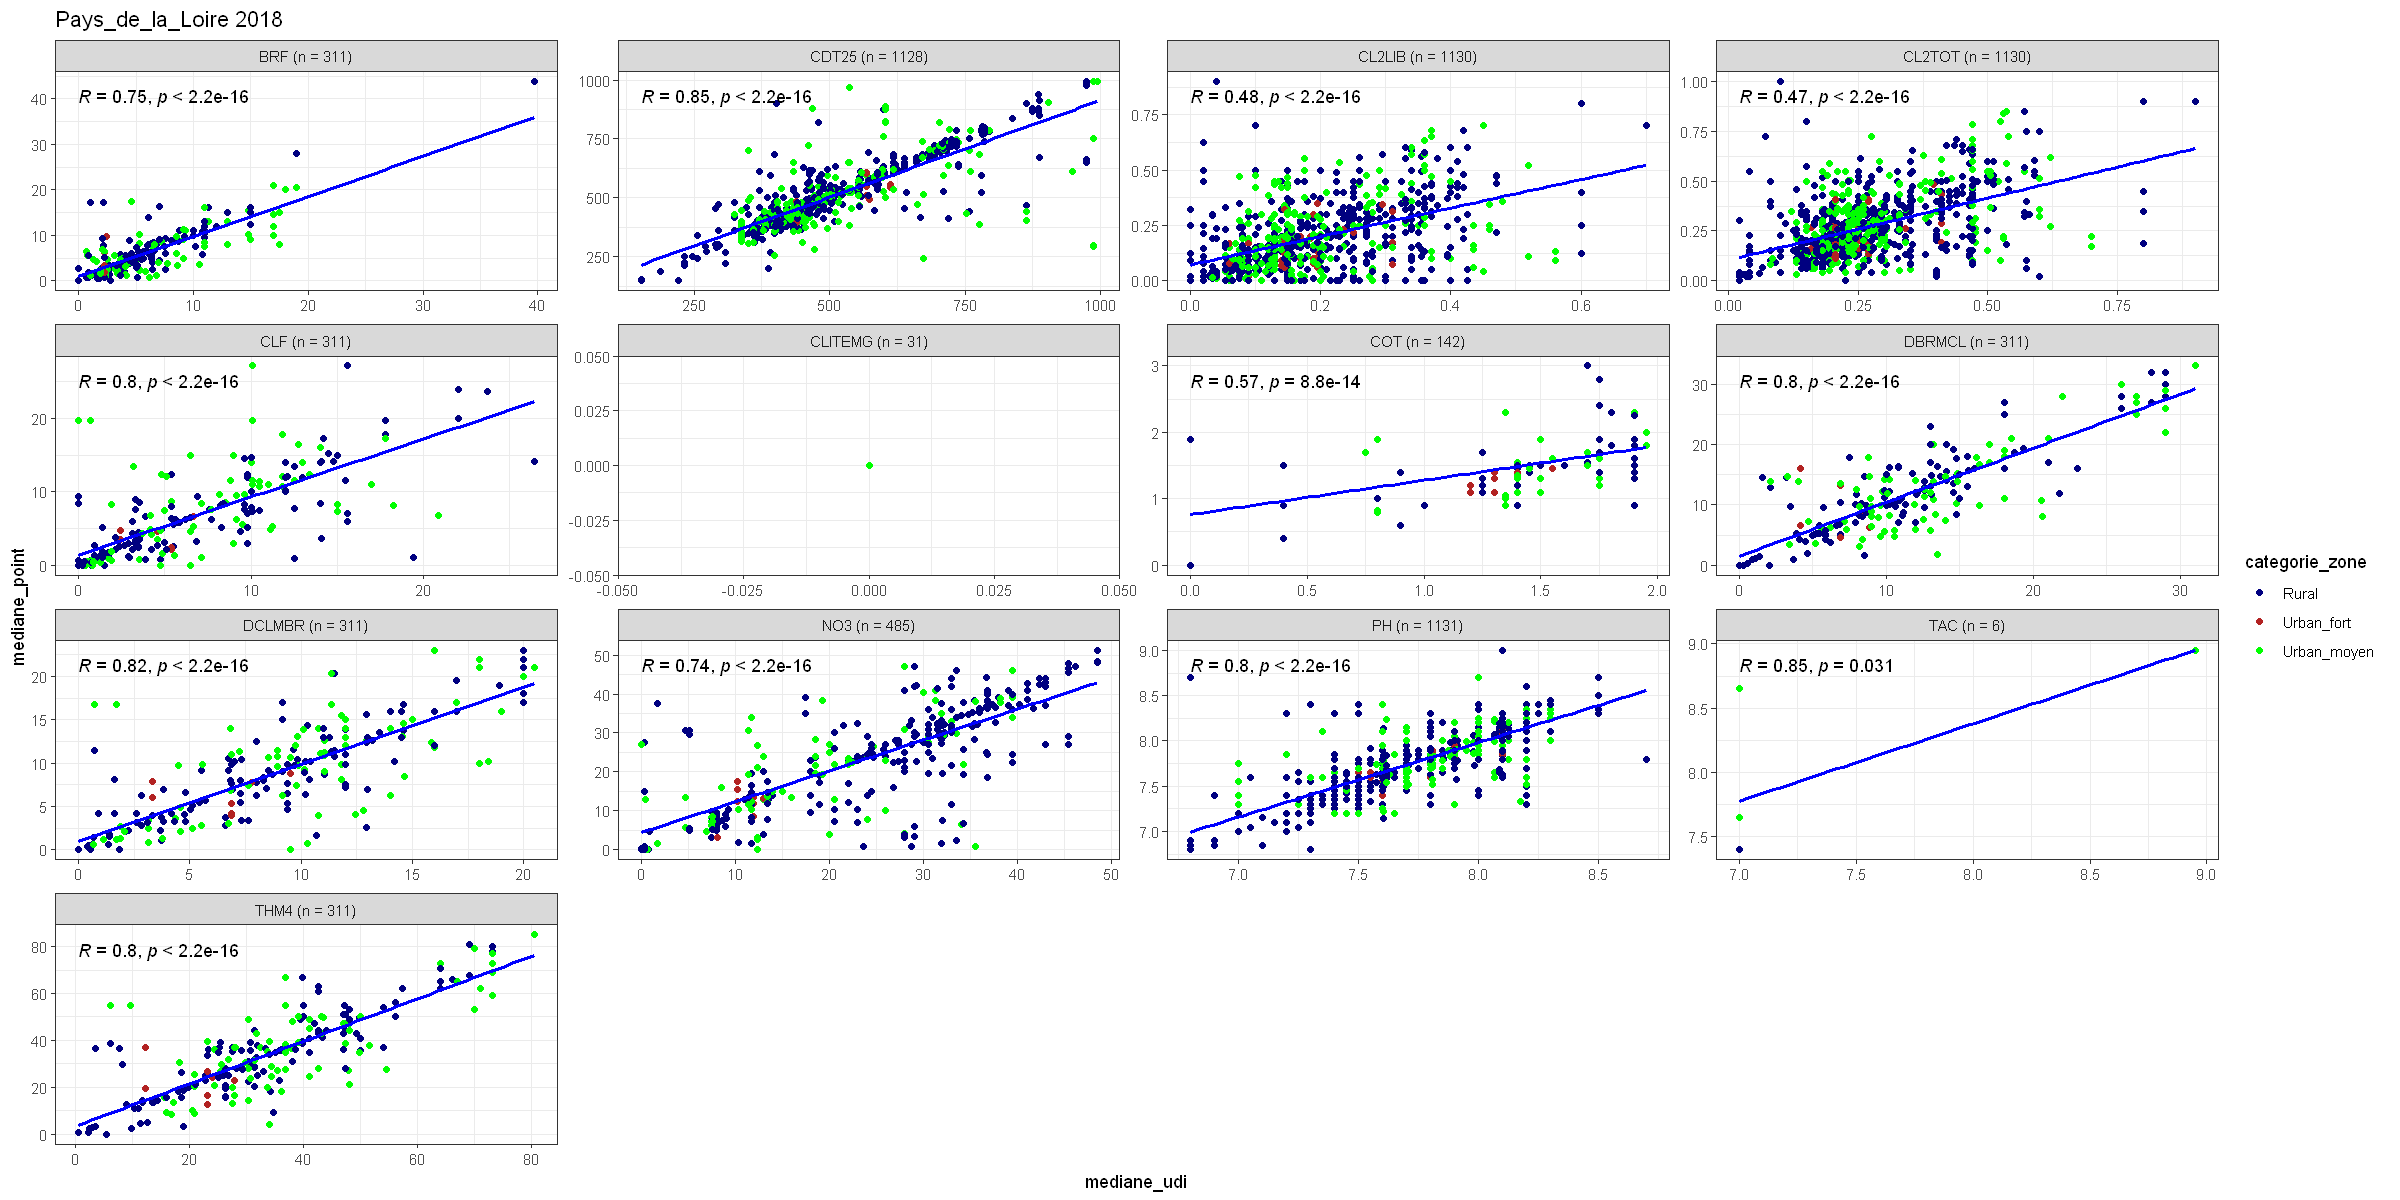

In [50]:
print("Region Pays_de_la_Loire")
all_graphes_avec_outliers[[9]]

##### Sans outliers

[1] "Region Pays_de_la_Loire sans outliers"


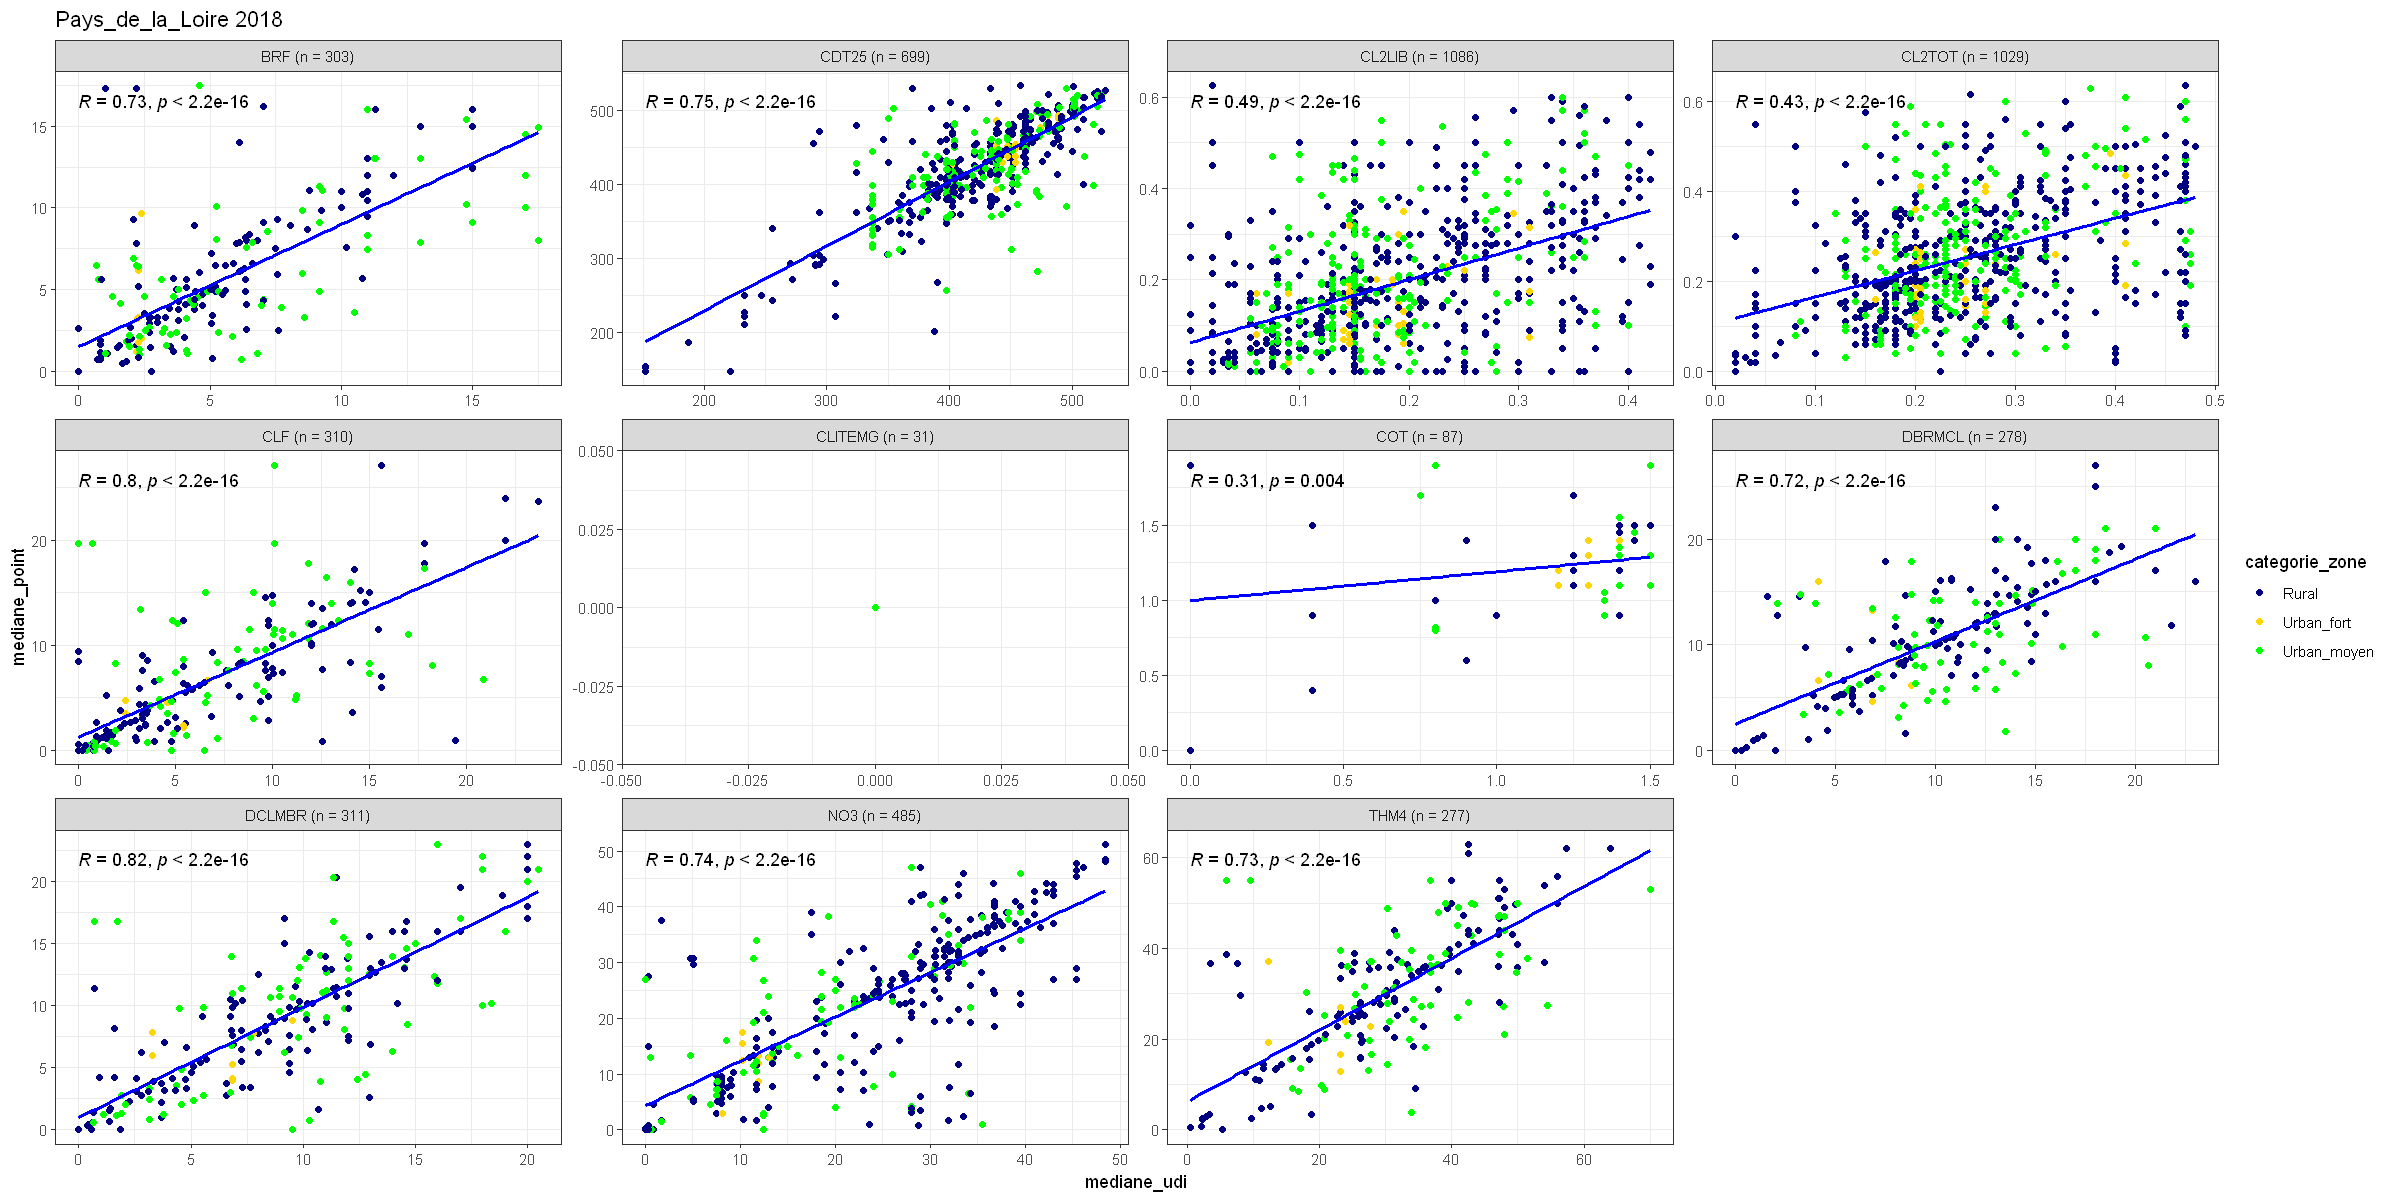

In [51]:
print("Region Pays_de_la_Loire sans outliers")
all_graphes_sans_outliers[[9]]


<div style="background-color:olivedrab; padding:10px">
<span style="color:white; font-weight:bold">Region PACA</span>
</div>

##### Avec outliers

[1] "Region PACA"


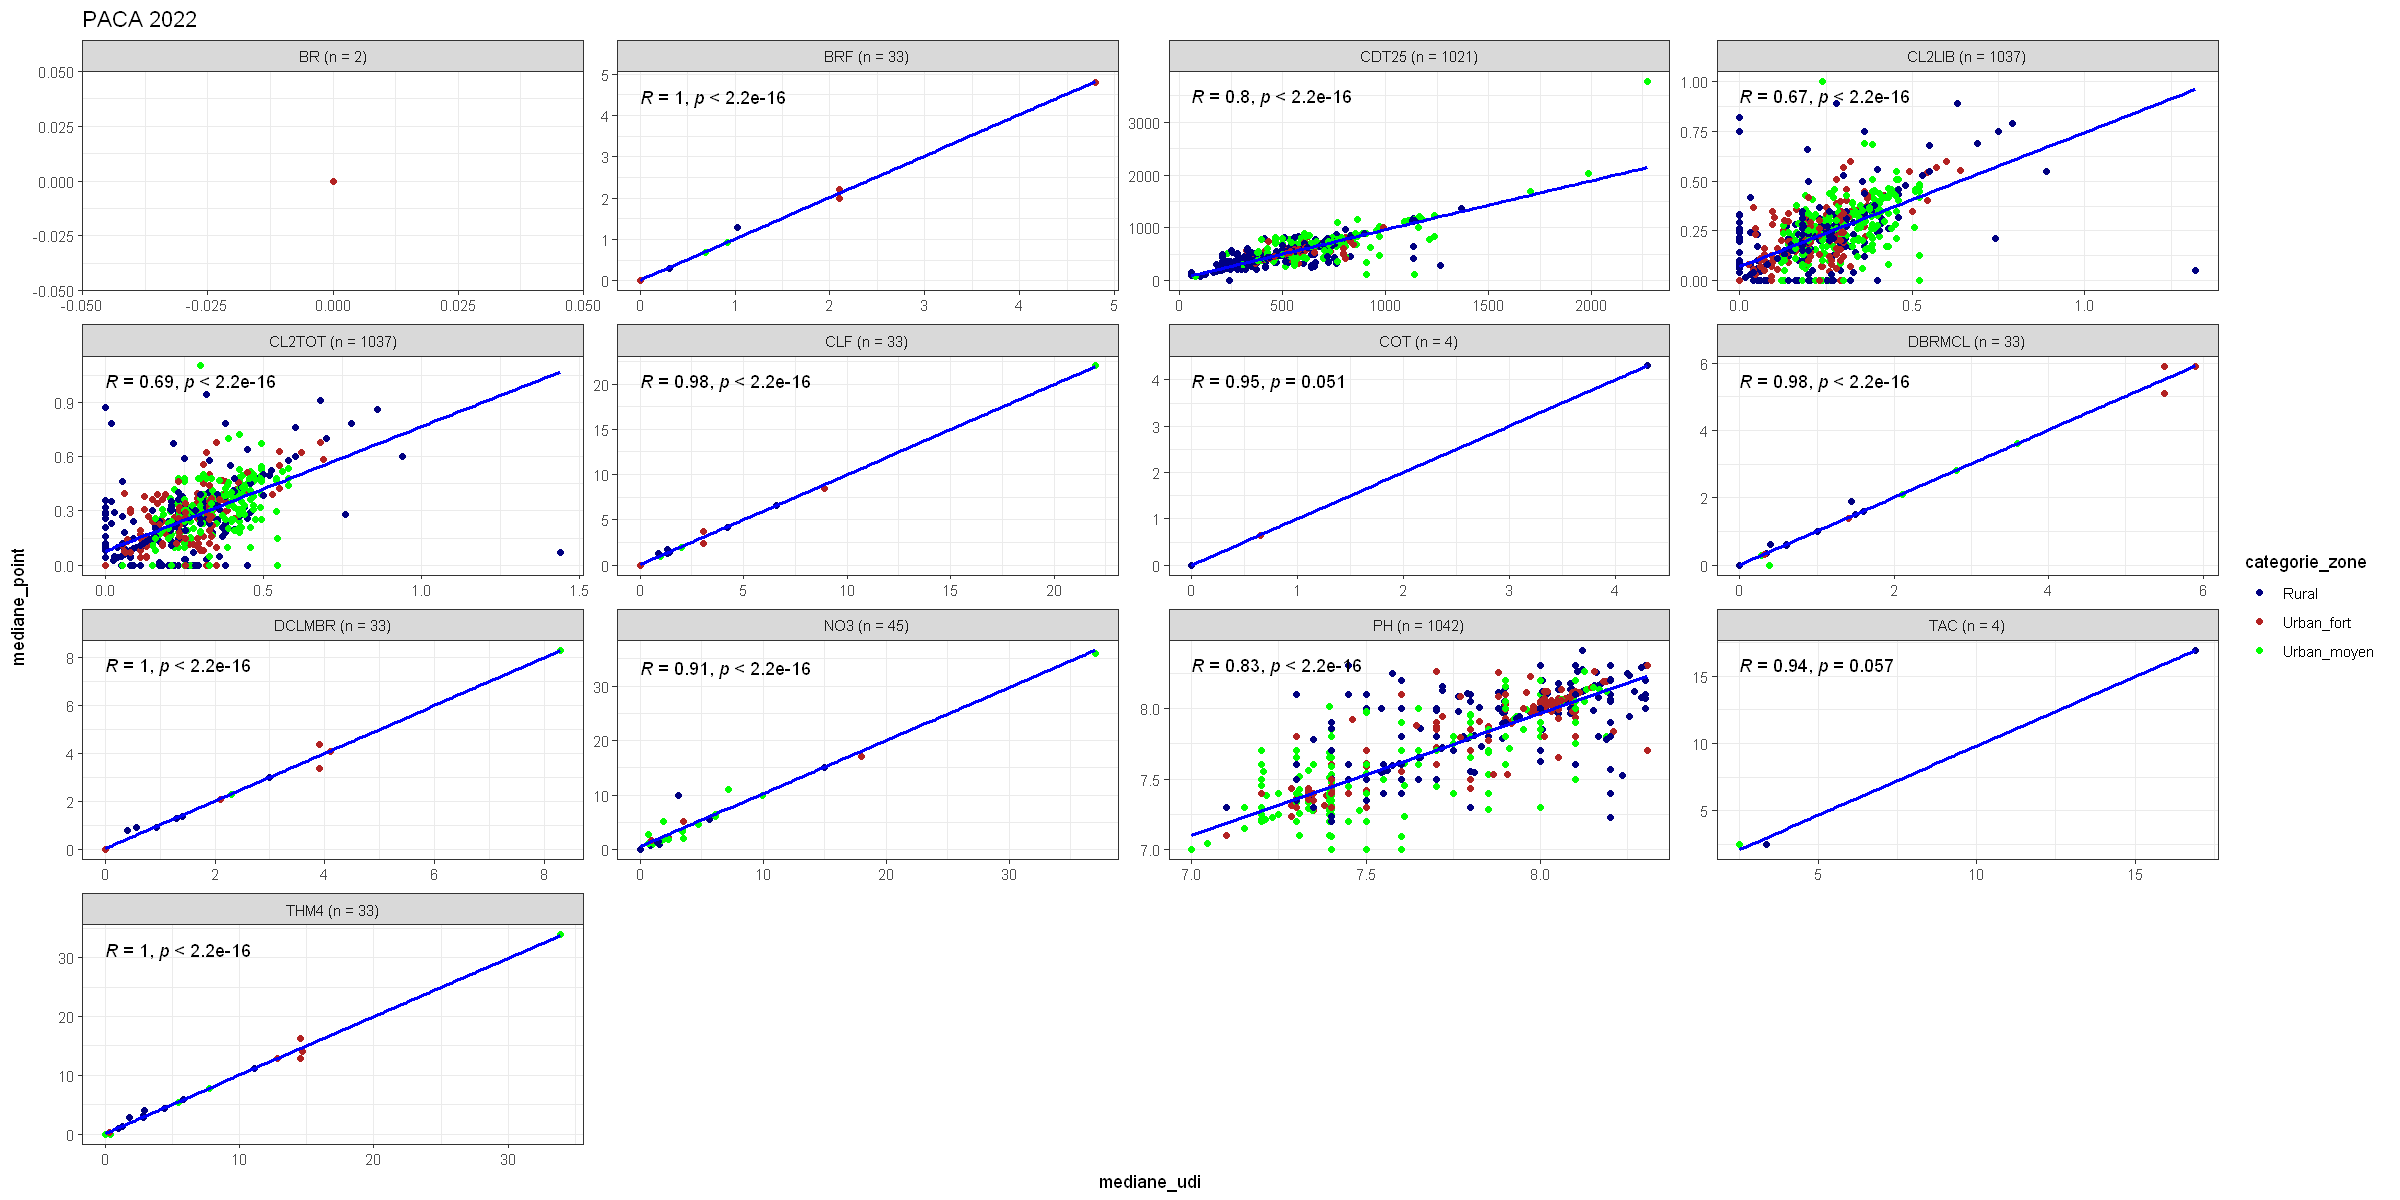

In [52]:
print("Region PACA")
all_graphes_avec_outliers[[10]]

##### Sans outliers

[1] "Region PACA sans outliers"


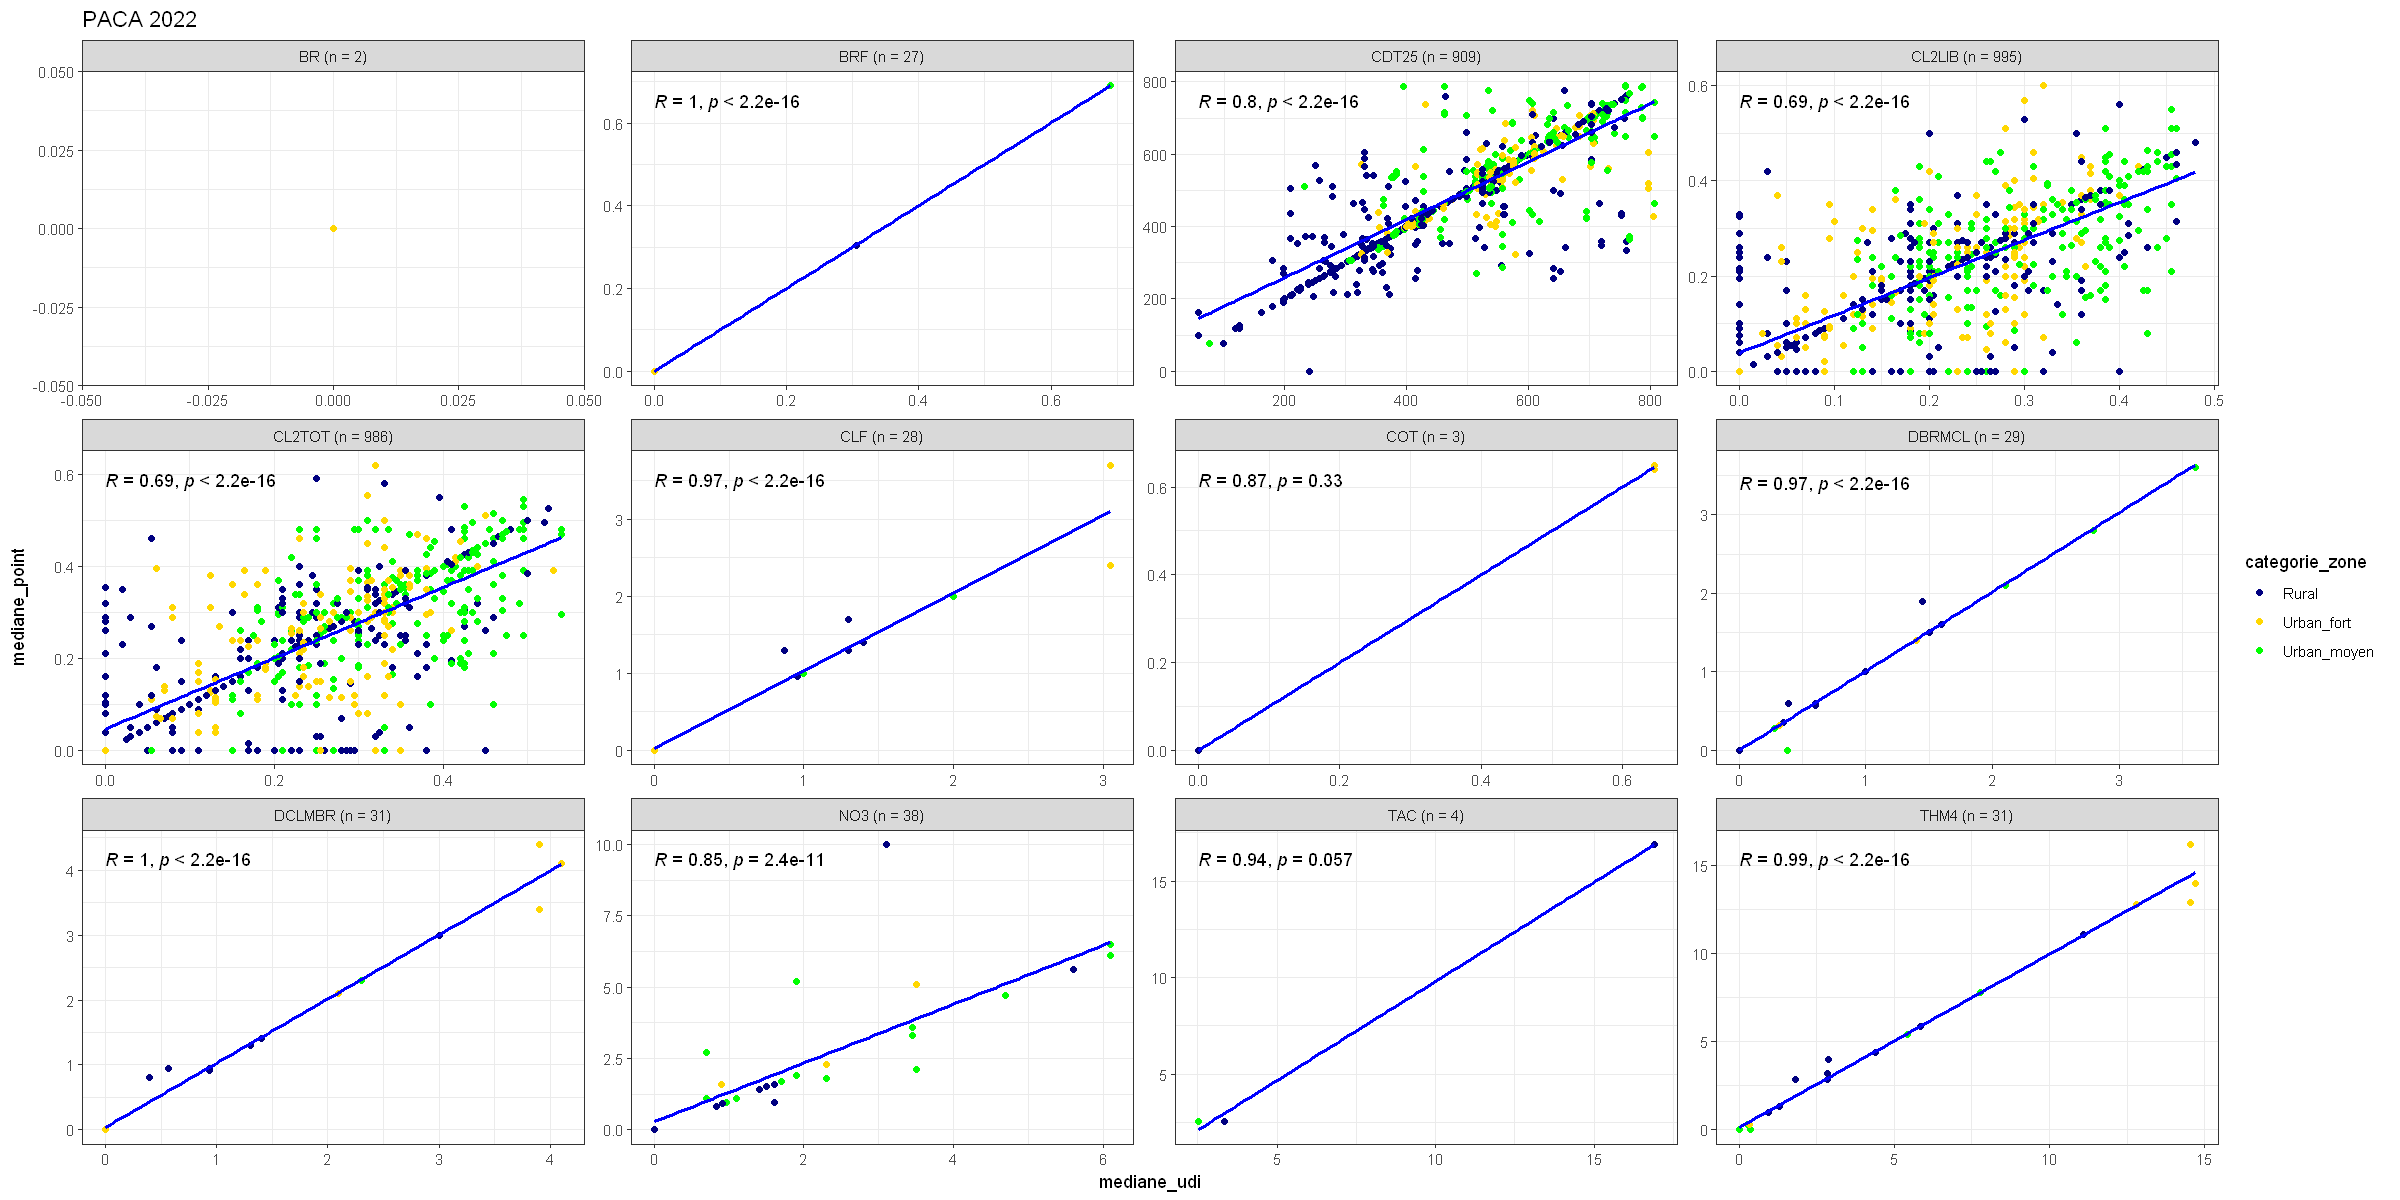

In [53]:
print("Region PACA sans outliers")
all_graphes_sans_outliers[[10]]

<div style="background-color:steelblue; padding:10px">    
<span style="color:white; text-transform:uppercase; font-weight:bold">Résumé des coefficients de corrélation selon les paramètres et la Région
    </span>     
</div>

In [54]:

# Calculer les coefficients de corrélation pour chaque paramètre, région et type_com
cor_summary <- tableau_analyse %>%
  filter(!is.na(mediane_udi), !is.na(mediane_point)) %>%
  filter(cdparametresiseeaux %in% liste_parametres_qualite) %>%
  group_by(cdparametresiseeaux, region) %>%
  summarise(correlation = cor(mediane_udi, mediane_point, method = "spearman"), .groups = "drop")

# Réorganiser le tableau 
cor_summary_pivot <- cor_summary %>%
  pivot_wider(names_from = cdparametresiseeaux, values_from = correlation)

# Afficher le tableau  réorganisé
cor_summary_pivot

Warning message in cor(mediane_udi, mediane_point, method = "spearman"):
"l'écart type est nulle"
Warning message in cor(mediane_udi, mediane_point, method = "spearman"):
"l'écart type est nulle"


region,BR,BRF,CDT,CDT25,CL2LIB,CL2TOT,CLATE,CLF,CLITEMG,COT,DBRMCL,DCLMBR,MOAC,NO3,PH,TAC,THM,THM4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PACA,NA,0.9998642,NA,0.8010306,0.6731576,0.6882515,NA,0.9837933,NA,0.9486833,0.9806353,0.9979830,NA,0.9050202,0.8333136,0.9428090,NA,0.9954530
Auvergne_Rhone_Alpes,NA,0.8444211,0.7581295,0.9137634,0.6517190,0.6652475,NA,0.9130465,0.8543560,0.9932203,0.7541934,0.8549901,NA,0.8893426,0.7509840,1.0000000,NA,0.8251522
Bourgogne_Franche_Comte,NA,0.8447343,NA,0.8688092,0.5964938,0.5969667,NA,0.7994540,0.9529627,0.9464187,0.8495528,0.7911461,0.8316555,0.8453043,0.6893666,0.9871272,NA,0.7900053
Bretagne,NA,0.9316652,NA,0.8901605,0.6761693,0.6568525,NA,0.8767606,NA,0.8395131,0.8887831,0.9003876,NA,0.7651528,0.7194817,0.7848951,NA,0.9144166
Centre_Val_de_Loire,NA,0.8580977,0.8996727,0.8818901,0.6216156,0.6198867,NA,0.8588500,0.9072947,0.8472015,0.8555981,0.8640650,NA,0.9076720,0.7529314,0.9888885,NA,0.8695187
Grand_Est,NA,0.8851993,NA,0.8811260,0.7118184,0.7208505,NA,0.8115882,0.9100752,0.9879587,0.7980662,0.7847581,NA,0.8122618,0.6883029,0.9211426,NA,0.7908282
Normandie,NA,0.7889973,NA,0.9143732,0.5808689,0.5519668,NA,0.7206304,1.0000000,0.6194185,0.7202061,0.7391332,NA,0.8575434,0.7330439,0.9437086,NA,0.6822655
Nouvelle_Aquitaine,NA,0.9437608,NA,0.9529550,0.5916876,0.5836351,NA,0.8339011,0.9928801,0.9399710,0.8922680,0.8493886,NA,0.8515979,0.7731225,0.8787811,NA,0.8535912
Occitanie,NA,0.7779742,0.5511716,0.8700715,0.5977773,0.6320762,0.7905694,0.8667088,0.8103793,NA,0.8046379,0.8048561,NA,0.7895648,0.7027641,1.0000000,NA,0.8021757


Les valeurs de corrélation varient de 0 à 1, où 0 représente une corrélation nulle et 1 représente une corrélation parfaite.


- En général, il existe une corrélation élevée entre les deux méthodes dans la plupart des régions pour l'ensemble des paramètres étudiés, indiquant une concordance générale entre les deux méthodes.

- Cependant, il y a des paramètres pour lesquels les corrélations sont moins élevées dans la plupart des régions. Par exemple, les paramètres CL2LIB et CL2TOT ont des valeurs de corrélation comprises entre 0,4 et 0,7, ce qui suggère une moins grande concordance entre les deux méthodes pour ces paramètres.

- Certaines régions présentent une forte concordance entre les deux méthodes pour certains paramètres, plus que d'autres. Par exemple, pour la région PACA, les coefficients de corrélation varient entre 0,8 et 1, ce qui indique une forte concordance entre les deux méthodes pour ces paramètres. En revanche, pour la Normandie, les coefficients de corrélation se situent autour de 0,7, et en Occitanie, ils sont autour de 0,7 à 0,8.


<div style="background-color:steelblue; padding:10px">    
<span style="color:white; text-transform:uppercase; font-weight:bold">Analyses visuelles supplémentaires - Comparaison des paramètres entre deux régions côtière et continentale 
    </span>     
</div>

Je vais prendre deux régions ayant des données de l'année 2021

Warning message:
"Removed 2036 rows containing non-finite values (stat_boxplot)."
Warning message:
"Removed 7535 rows containing non-finite values (stat_boxplot)."


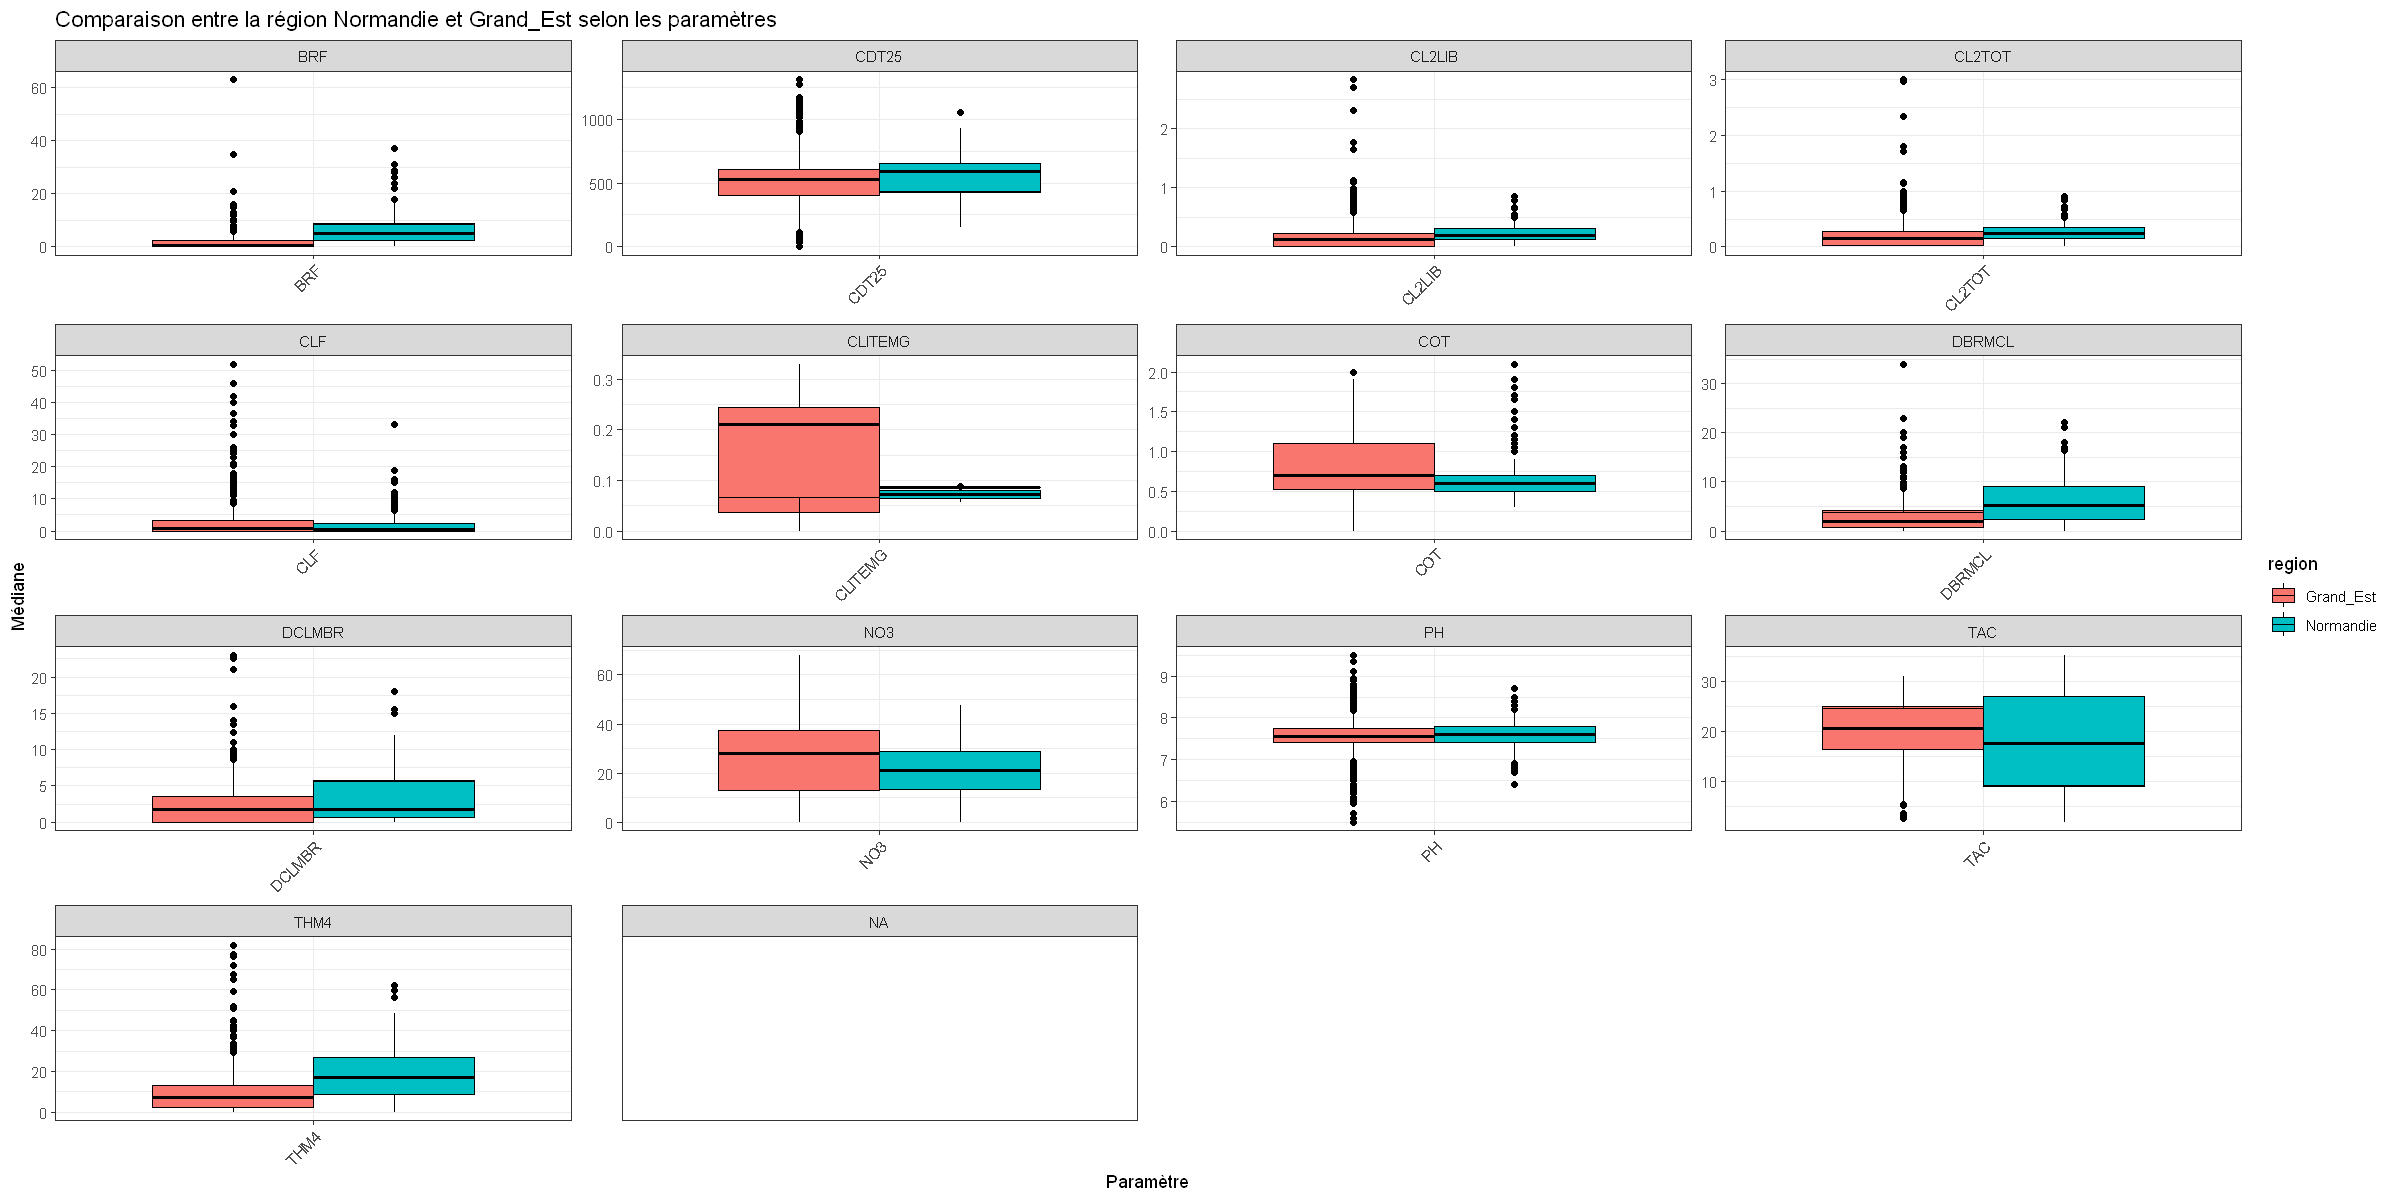

In [55]:
# Sélectionner les deux régions spécifiques
region_select2 <- c("Normandie", "Grand_Est")

ggplot(data = subset(tableau_analyse, region %in% region_select2)) +
  geom_boxplot(aes(x = cdparametresiseeaux, y = mediane_udi, fill = region), color = "black", position = position_dodge(width = 0.75)) +
  geom_boxplot(aes(x = cdparametresiseeaux, y = mediane_point, fill = region), color = "black", position = position_dodge(width = 0.75)) +
  xlab("Paramètre") +
  ylab("Médiane") +
  ggtitle("Comparaison entre la région Normandie et Grand_Est selon les paramètres") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  facet_wrap(~ cdparametresiseeaux, scales = "free")

Sur ce graphique, on peut voir qu'en général les 2 régions ont le même niveau concernant les paramètres de qualité de l'eau. Sauf pour les paramètres "CLITMG,COT, NO3 qui sont plus élévés dans le Grand_Est par rapport à la Normandie. Et en Normandie, les valeurs de TAC est plus étendu sur le boxplot que dans le Grand-Est